# EDA-Gender and opportunities - Gender analysis of education, employability and parenthood by region
## TEAM 5

Laura Betancur,
Luisa Arango,
Lina María Carmona,
Danny Esteban Giraldo,
Jorge Luis Morales,
Nicolas Villamizar,
Wilson Zuleta.

### In this delivery, we complemented the graphs interpretations and made a non-supervised model to determine the similarities between countries, beetwen 1994-2019. Our future idea is to investigate social facts that contibuted to this clusters, and make other non-supervised models, that would help us see the similarity/difference between countries in specific years for different indicators.  

Import libraries:

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

Data bases reading

In [2]:
df = pd.read_csv('Gender_Stats.csv', sep = ";")
df_indicators = pd.read_csv('IndicatorCodes.csv', sep =";")
df_countries = pd.read_csv('Countries.csv', sep =";")
df_indicator_mapping = pd.read_csv('IndCode_IndName.csv', sep =";")
df_gini = pd.read_csv("UNdata_Export_20220918_033155794.csv")
df_1=pd.read_csv("females_aged_15_24_employment_rate_percent.xlsx - females_aged_15_24_employment_r.csv")
df_3 = pd.read_csv("aged_15_24_employment_rate_percent.xlsx - aged_15_24_employment_rate_perc.csv")

## Pasar de Indicator Code a Indicator Name

In [3]:
IC = "Indicator Code"
IN = "Indicator Name"

def get_indicator_name(code:str) -> str:
    """ Find the indicator name using the indicator code
    Example:
        get_indicator_name("SG.APL.PSPT.EQ")
    """
    try:
        return df_indicator_mapping[df_indicator_mapping[IC] == code.strip()][IN].values[0]
    except IndexError:
        raise ValueError(f"This value does not exist. Check the {IC}")

In [4]:
df.head()#Visualization of the first 5 rows of the DF Gender Stats - Main DF

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info() #Visualization of the data types and non-null values of the DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233544 entries, 0 to 233543
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country Name    233544 non-null  object
 1   Country Code    233544 non-null  object
 2   Indicator Name  233544 non-null  object
 3   Indicator Code  233544 non-null  object
 4   1960            10640 non-null   object
 5   1961            10587 non-null   object
 6   1962            11327 non-null   object
 7   1963            10746 non-null   object
 8   1964            10775 non-null   object
 9   1965            10864 non-null   object
 10  1966            11024 non-null   object
 11  1967            11596 non-null   object
 12  1968            11038 non-null   object
 13  1969            11129 non-null   object
 14  1970            22462 non-null   object
 15  1971            25202 non-null   object
 16  1972            25676 non-null   object
 17  1973            25081 non-nul

In [6]:
df.shape #Display of the number of rows and columns of the original DF

(233544, 65)

Years that we are not going to use in our analysis that are in the DF. It was decided not to use these years due to the little amount of information they have and to make the analysis more practical.

In [7]:
years = ["1960","1961","1962","1963",'1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1995','1996','1997','1998','2000','2001','2002','2003','2005','2006','2007','2008','2010','2011','2012','2013','2015','2016','2017','2018',"2020"]

In [8]:
df = df.drop((years), axis=1) #Previously selected years are deleted

In [9]:
df = df.drop(["Country Code"], axis=1)   #The column with the country codes is removed as it is unnecessary

In [10]:
df.head() #Modified DF visualization

,Country Name,Indicator Name,Indicator Code,1994,1999,2004,2009,2014,2019
0,Arab World,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# We try to fill the null values with Not Available,
#but as the rest of the data is numbers (float64), it did not allowed us making graphics 
#due to lack of compatibility of data string-float
#df=df.fillna("Not Available")

In [12]:
# df with the "Indicator Codes" that we select to do the analysis
df_indicators 

,Indicator Code
0,SG.HLD.HEAD.EQ
1,SG.GET.JOBS.EQ
2,SG.BUS.REGT.EQ
3,SG.IND.WORK.EQ
4,SG.DML.PRGW
5,SL.EMP.TOTL.SP.FE.NE.ZS
6,SL.EMP.TOTL.SP.MA.NE.ZS
7,SL.EMP.TOTL.SP.NE.ZS
8,SE.TER.GRAD.FE.AG.ZS
9,UIS.FGP.5T8.F400


In [13]:
# Convert the df_indicators to a list of strings
indicators=list(df_indicators["Indicator Code"])
indicators

['SG.HLD.HEAD.EQ',
 'SG.GET.JOBS.EQ',
 'SG.BUS.REGT.EQ',
 'SG.IND.WORK.EQ',
 'SG.DML.PRGW',
 'SL.EMP.TOTL.SP.FE.NE.ZS',
 'SL.EMP.TOTL.SP.MA.NE.ZS',
 'SL.EMP.TOTL.SP.NE.ZS',
 'SE.TER.GRAD.FE.AG.ZS',
 'UIS.FGP.5T8.F400',
 'SE.TER.GRAD.FE.EN.ZS',
 'UIS.FGP.5T8.F600',
 'IC.FRM.FEMO.ZS',
 'SI.POV.GINI',
 'SL.TLF.ADVN.ZS',
 'SL.TLF.ADVN.FE.ZS',
 'SL.TLF.ADVN.MA.ZS',
 'SL.TLF.BASC.ZS',
 'SL.TLF.BASC.FE.ZS',
 'SL.TLF.BASC.MA.ZS',
 'SL.TLF.INTM.ZS',
 'SL.TLF.INTM.FE.ZS',
 'SL.TLF.INTM.MA.ZS',
 'SL.TLF.TOTL.FE.ZS']

In [14]:
 #Filter on df in the Indicator Code column, those with the indicator from the indicators list
df = df[df["Indicator Code"].isin(indicators)]
df

,Country Name,Indicator Name,Indicator Code,1994,1999,2004,2009,2014,2019
1,Arab World,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,NaN,NaN,NaN,NaN,NaN,NaN
158,Arab World,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
232971,Zimbabwe,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS,NaN,NaN,NaN,NaN,"90,26000214",48
232972,Zimbabwe,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,"80,05000305","48,45000076"
232973,Zimbabwe,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,NaN,NaN,NaN,NaN,"74,81999969","38,68999863"
232974,Zimbabwe,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,NaN,NaN,NaN,NaN,"84,41000366","58,75999832"


In [15]:
#List with the countries selected for the study
countries=list(df_countries["Country Name"]) 
countries

['Brazil',
 'Canada',
 'Colombia',
 'Egypt, Arab Rep.',
 'France',
 'United Kingdom',
 'Italy',
 'India',
 'Japan',
 'Mexico',
 'United States',
 'Germany',
 'Russian Federation']

In [16]:
 #Filter in my df in the Country Name column, only those that are in countries
df = df[df["Country Name"].isin(countries)]
df

,Country Name,Indicator Name,Indicator Code,1994,1999,2004,2009,2014,2019
63937,Brazil,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,0,0,1,1,1,1
63939,Brazil,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,1,1,1,1,1,1
63942,Brazil,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,0,0,1,1,1,1
63948,Brazil,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,1,1,1,1,1,1
64094,Brazil,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
224091,United States,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS,"47,11999893","49,06999969","53,61000061","53,58000183","52,68000031","54,25999832"
224092,United States,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,"65,98999786","65,48999786","63,18000031","61,22999954","57,70999908","57,36000061"
224093,United States,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,"58,08000183","58,18999863",56,"54,11000061","50,63000107","50,11000061"
224094,United States,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,"75,01999664","73,69999695","71,04000092","68,72000122","64,98999786","64,61000061"


In [17]:
#Unifying the names of the selected countries in the main DF, with the
#names that are in the other DF
df["Country Name"]=df["Country Name"].str.replace("Egypt, Arab Rep.", "Egypt")
df["Country Name"]=df["Country Name"].str.replace("Russian Federation","Russia") 

<ipython-input-17-72395438ec5e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Country Name"]=df["Country Name"].str.replace("Egypt, Arab Rep.", "Egypt")
<ipython-input-17-72395438ec5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country Name"]=df["Country Name"].str.replace("Egypt, Arab Rep.", "Egypt")
<ipython-input-17-72395438ec5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country Name"]=df["Country Name"].str.replace("Russian Fe

In [18]:
#We verify that in fact, the change has been made
df[df["Country Name"].str.contains("Russia")]

,Country Name,Indicator Name,Indicator Code,1994,1999,2004,2009,2014,2019
183817,Russia,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,1,1,1,1,1,1
183819,Russia,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,1,1,1,1,1,1
183822,Russia,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,1,1,1,1,1,1
183828,Russia,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,0,0,0,0,0,0
183974,Russia,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,1,1,1,1,1,1
184012,Russia,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,"54,36000061","52,00999832","56,25999832","57,74000168","60,29000092","52,90999985"
184014,Russia,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.NE.ZS,"67,37999725","62,04999924","64,90000153","66,87000275","70,98999786","67,26999664"
184016,Russia,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.NE.ZS,"60,50999832","56,77000046","60,33000183","62,02000046","65,33000183","59,41999817"
184043,Russia,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN
184045,Russia,"Female share of graduates in Business, Adminis...",UIS.FGP.5T8.F400,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#We reset the index of the manipulated DF
df = df.reset_index()
df

,index,Country Name,Indicator Name,Indicator Code,1994,1999,2004,2009,2014,2019
0,63937,Brazil,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,0,0,1,1,1,1
1,63939,Brazil,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,1,1,1,1,1,1
2,63942,Brazil,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,0,0,1,1,1,1
3,63948,Brazil,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,1,1,1,1,1,1
4,64094,Brazil,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
307,224091,United States,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS,"47,11999893","49,06999969","53,61000061","53,58000183","52,68000031","54,25999832"
308,224092,United States,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,"65,98999786","65,48999786","63,18000031","61,22999954","57,70999908","57,36000061"
309,224093,United States,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,"58,08000183","58,18999863",56,"54,11000061","50,63000107","50,11000061"
310,224094,United States,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,"75,01999664","73,69999695","71,04000092","68,72000122","64,98999786","64,61000061"


In [20]:
#We unify the name of the columns to lower_case
df.columns= df.columns.str.lower().str.replace(" ", "_")

In [21]:
#Since resetting the DF index created a column with the old indexes, we deleted it.
df=df.drop(columns="index")
df

,country_name,indicator_name,indicator_code,1994,1999,2004,2009,2014,2019
0,Brazil,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,0,0,1,1,1,1
1,Brazil,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,1,1,1,1,1,1
2,Brazil,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,0,0,1,1,1,1
3,Brazil,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,1,1,1,1,1,1
4,Brazil,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
307,United States,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS,"47,11999893","49,06999969","53,61000061","53,58000183","52,68000031","54,25999832"
308,United States,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,"65,98999786","65,48999786","63,18000031","61,22999954","57,70999908","57,36000061"
309,United States,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,"58,08000183","58,18999863",56,"54,11000061","50,63000107","50,11000061"
310,United States,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,"75,01999664","73,69999695","71,04000092","68,72000122","64,98999786","64,61000061"


In [22]:
# Change format of all columns from 1994 to 2019, to decimal using period(.) to be able to pass them to float,
#with a lambda function
df[df.columns[3:]] = df[df.columns[3:]].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce'))

In [23]:
df.dtypes #Verifying the data type change from object to float

country_name       object
indicator_name     object
indicator_code     object
1994              float64
1999              float64
2004              float64
2009              float64
2014              float64
2019              float64
dtype: object

In [24]:
# Boolean column list
column_boolean_indicators = [
    "SG.IND.WORK.EQ",
    "SG.DML.PRGW",
    "SG.HLD.HEAD.EQ",
    "SG.GET.JOBS.EQ",
    "SG.BUS.REGT.EQ"
]

In [25]:
# List of columns corresponding to GINI indicator
column_gini =["SI.POV.GINI"]

In [26]:
# We melt the main DF to flatten the information
df_melted = pd.melt(df,id_vars=["country_name","indicator_name","indicator_code"],var_name='years')
df_melted

,country_name,indicator_name,indicator_code,years,value
0,Brazil,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,1994,0.000000
1,Brazil,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,1994,1.000000
2,Brazil,A woman can register a business in the same wa...,SG.BUS.REGT.EQ,1994,0.000000
3,Brazil,A woman can work in an industrial job in the s...,SG.IND.WORK.EQ,1994,1.000000
4,Brazil,Dismissal of pregnant workers is prohibited (1...,SG.DML.PRGW,1994,1.000000
...,...,...,...,...,...
1867,United States,"Labor force with basic education, male (% of m...",SL.TLF.BASC.MA.ZS,2019,54.259998
1868,United States,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,2019,57.360001
1869,United States,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,2019,50.110001
1870,United States,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,2019,64.610001


In [27]:
#We make a pivot table to transform the indicators into columns
df_pivoted = df_melted.pivot(index =['country_name','years'],columns = 'indicator_code', values='value')

In [28]:
df_pivoted

indicator_code       IC.FRM.FEMO.ZS  SE.TER.GRAD.FE.AG.ZS  \
country_name  years                                         
Brazil        1994              NaN                   NaN   
              1999              NaN                   NaN   
              2004              NaN              40.68838   
              2009             50.2              39.35049   
              2014              NaN              45.57245   
...                             ...                   ...   
United States 1999              NaN                   NaN   
              2004              NaN                   NaN   
              2009              NaN                   NaN   
              2014              NaN              50.64160   
              2019              NaN                   NaN   

indicator_code       SE.TER.GRAD.FE.EN.ZS  SG.BUS.REGT.EQ  SG.DML.PRGW  \
country_name  years                                                      
Brazil        1994                    NaN             0.0          1.0   
              1999                    NaN             0.0          1.0   
              2004               30.18080             1.0          1.0   
              2009               29.52170             1.0          1.0   
              2014               34.96844             1.0          1.0   
...                                   ...             ...          ...   
United States 1999                    NaN             1.0          1.0   
              2004                    NaN             1.0          1.0   
              2009                    NaN             1.0          1.0   
              2014               21.46737             1.0          1.0   
              2019                    NaN             1.0          1.0   

indicator_code       SG.GET.JOBS.EQ  SG.HLD.HEAD.EQ  SG.IND.WORK.EQ  \
country_name  years                                                   
Brazil        1994              1.0             0.0             1.0   
              1999              1.0             0.0             1.0   
              2004              1.0             1.0             1.0   
              2009              1.0             1.0             1.0   
              2014              1.0             1.0             1.0   
...                             ...             ...             ...   
United States 1999              1.0             1.0             1.0   
              2004              1.0             1.0             1.0   
              2009              1.0             1.0             1.0   
              2014              1.0             1.0             1.0   
              2019              1.0             1.0             1.0   

indicator_code       SI.POV.GINI  SL.EMP.TOTL.SP.FE.NE.ZS  ...  \
country_name  years                                        ...   
Brazil        1994           NaN                      NaN  ...   
              1999          59.0                43.939999  ...   
              2004          56.5                49.389999  ...   
              2009          53.7                50.430000  ...   
              2014          52.1                47.299999  ...   
...                          ...                      ...  ...   
United States 1999          40.0                57.430000  ...   
              2004          40.3                55.970001  ...   
              2009          40.6                54.419998  ...   
              2014          41.5                53.520000  ...   
              2019           NaN                55.360001  ...   

indicator_code       SL.TLF.ADVN.ZS  SL.TLF.BASC.FE.ZS  SL.TLF.BASC.MA.ZS  \
country_name  years                                                         
Brazil        1994              NaN                NaN                NaN   
              1999        83.550003          49.240002          81.430000   
              2004        83.489998          52.939999          79.879997   
              2009        83.919998          51.720001          77.690002  

# Graph involving booleans

In [29]:
#Making a DF only for boolean indicators
df_booleans=df_pivoted[column_boolean_indicators]
df_booleans=df_booleans.astype("bool")
df_booleans.reset_index(inplace=True)
df_booleans

indicator_code,country_name,years,SG.IND.WORK.EQ,SG.DML.PRGW,SG.HLD.HEAD.EQ,SG.GET.JOBS.EQ,SG.BUS.REGT.EQ
0,Brazil,1994,True,True,False,True,False
1,Brazil,1999,True,True,False,True,False
2,Brazil,2004,True,True,True,True,True
3,Brazil,2009,True,True,True,True,True
4,Brazil,2014,True,True,True,True,True
...,...,...,...,...,...,...,...
73,United States,1999,True,True,True,True,True
74,United States,2004,True,True,True,True,True
75,United States,2009,True,True,True,True,True
76,United States,2014,True,True,True,True,True


Comparative graph of "Employment to population ratio 15+ female" with "A woman can work in an industrial job in the same way as a man"

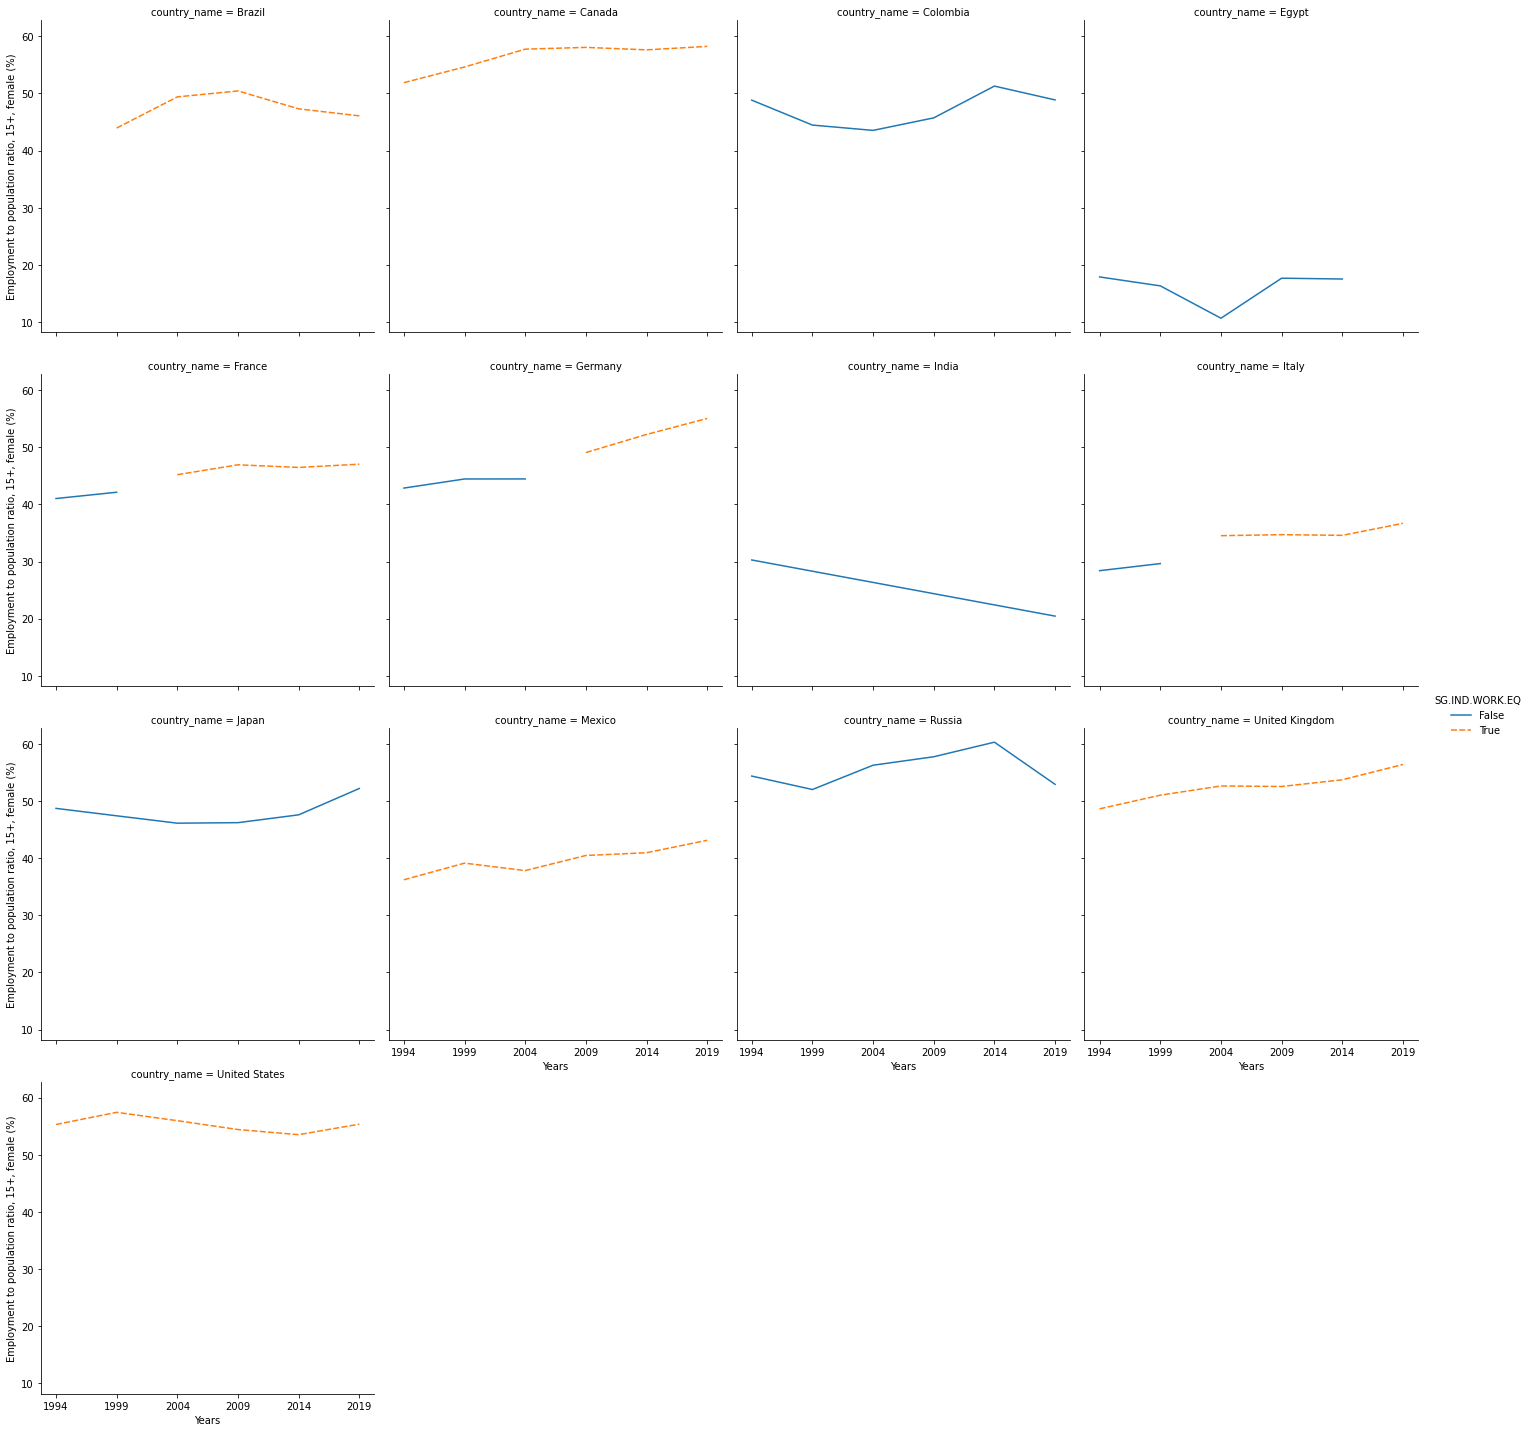

In [30]:
#To df_booleans is added the indicator "A woman can work in an industrial job in the same way as a man"
w_force_indicator ="SL.EMP.TOTL.SP.FE.NE.ZS"
df_w_force= df_booleans.copy()
df_w_force=df_w_force.join(df_pivoted.reset_index()[w_force_indicator])
#We graph over the years, for each country, how the female workforce has changed
#and yes it has changed the way a woman can get an industrial job 
sns.relplot(
    data=df_w_force, x="years", y="SL.EMP.TOTL.SP.FE.NE.ZS",
    col="country_name", hue="SG.IND.WORK.EQ", style="SG.IND.WORK.EQ",
    kind="line", col_wrap=4
).set_axis_labels("Years", get_indicator_name("SL.EMP.TOTL.SP.FE.NE.ZS"))

Analyzing in each country whether the ease for women to access industrial work has changed, and its influence on the total percentage of women over 15 years old who work in each country, we find the following: 

In India and Egypt, the female labor force is deficient, and their ease of obtaining employment in the industry have not changed; while in developed countries such as the United States, Japan, and Canada the percentage of the female labor force increased, even though in Japan the ease of accessing industrial jobs for women has never been equal to that of men, and in Canada and the United States it has always been equal.

For Europe, except Russia, it has been found that the total female labor force of women has increased in the last 25 years. 
In France, Germany, and Italy, the ease with which women found industrial work shifted in their favor in the 2000s, which also increased the total female labor force in these countries.

On the other hand, in Colombia, this female labor force has remained between 40% and 50%, without changing the ease for women to access industrial jobs. Which contrast, with the other Latin American countries (Brazil and Mexico), were the ease for women to access industrial jobs has been equal to that of men since 1994. 

In [31]:
#Database to plot without booleans df_no_bool
df_no_bool=df_pivoted.drop(columns=column_boolean_indicators)
#Database to graph without booleans and without GINI index
df_floats=df_no_bool.drop(columns=column_gini)

# Heat chart of indices that are percentage

<AxesSubplot:xlabel='indicator_code', ylabel='country_name-years'>

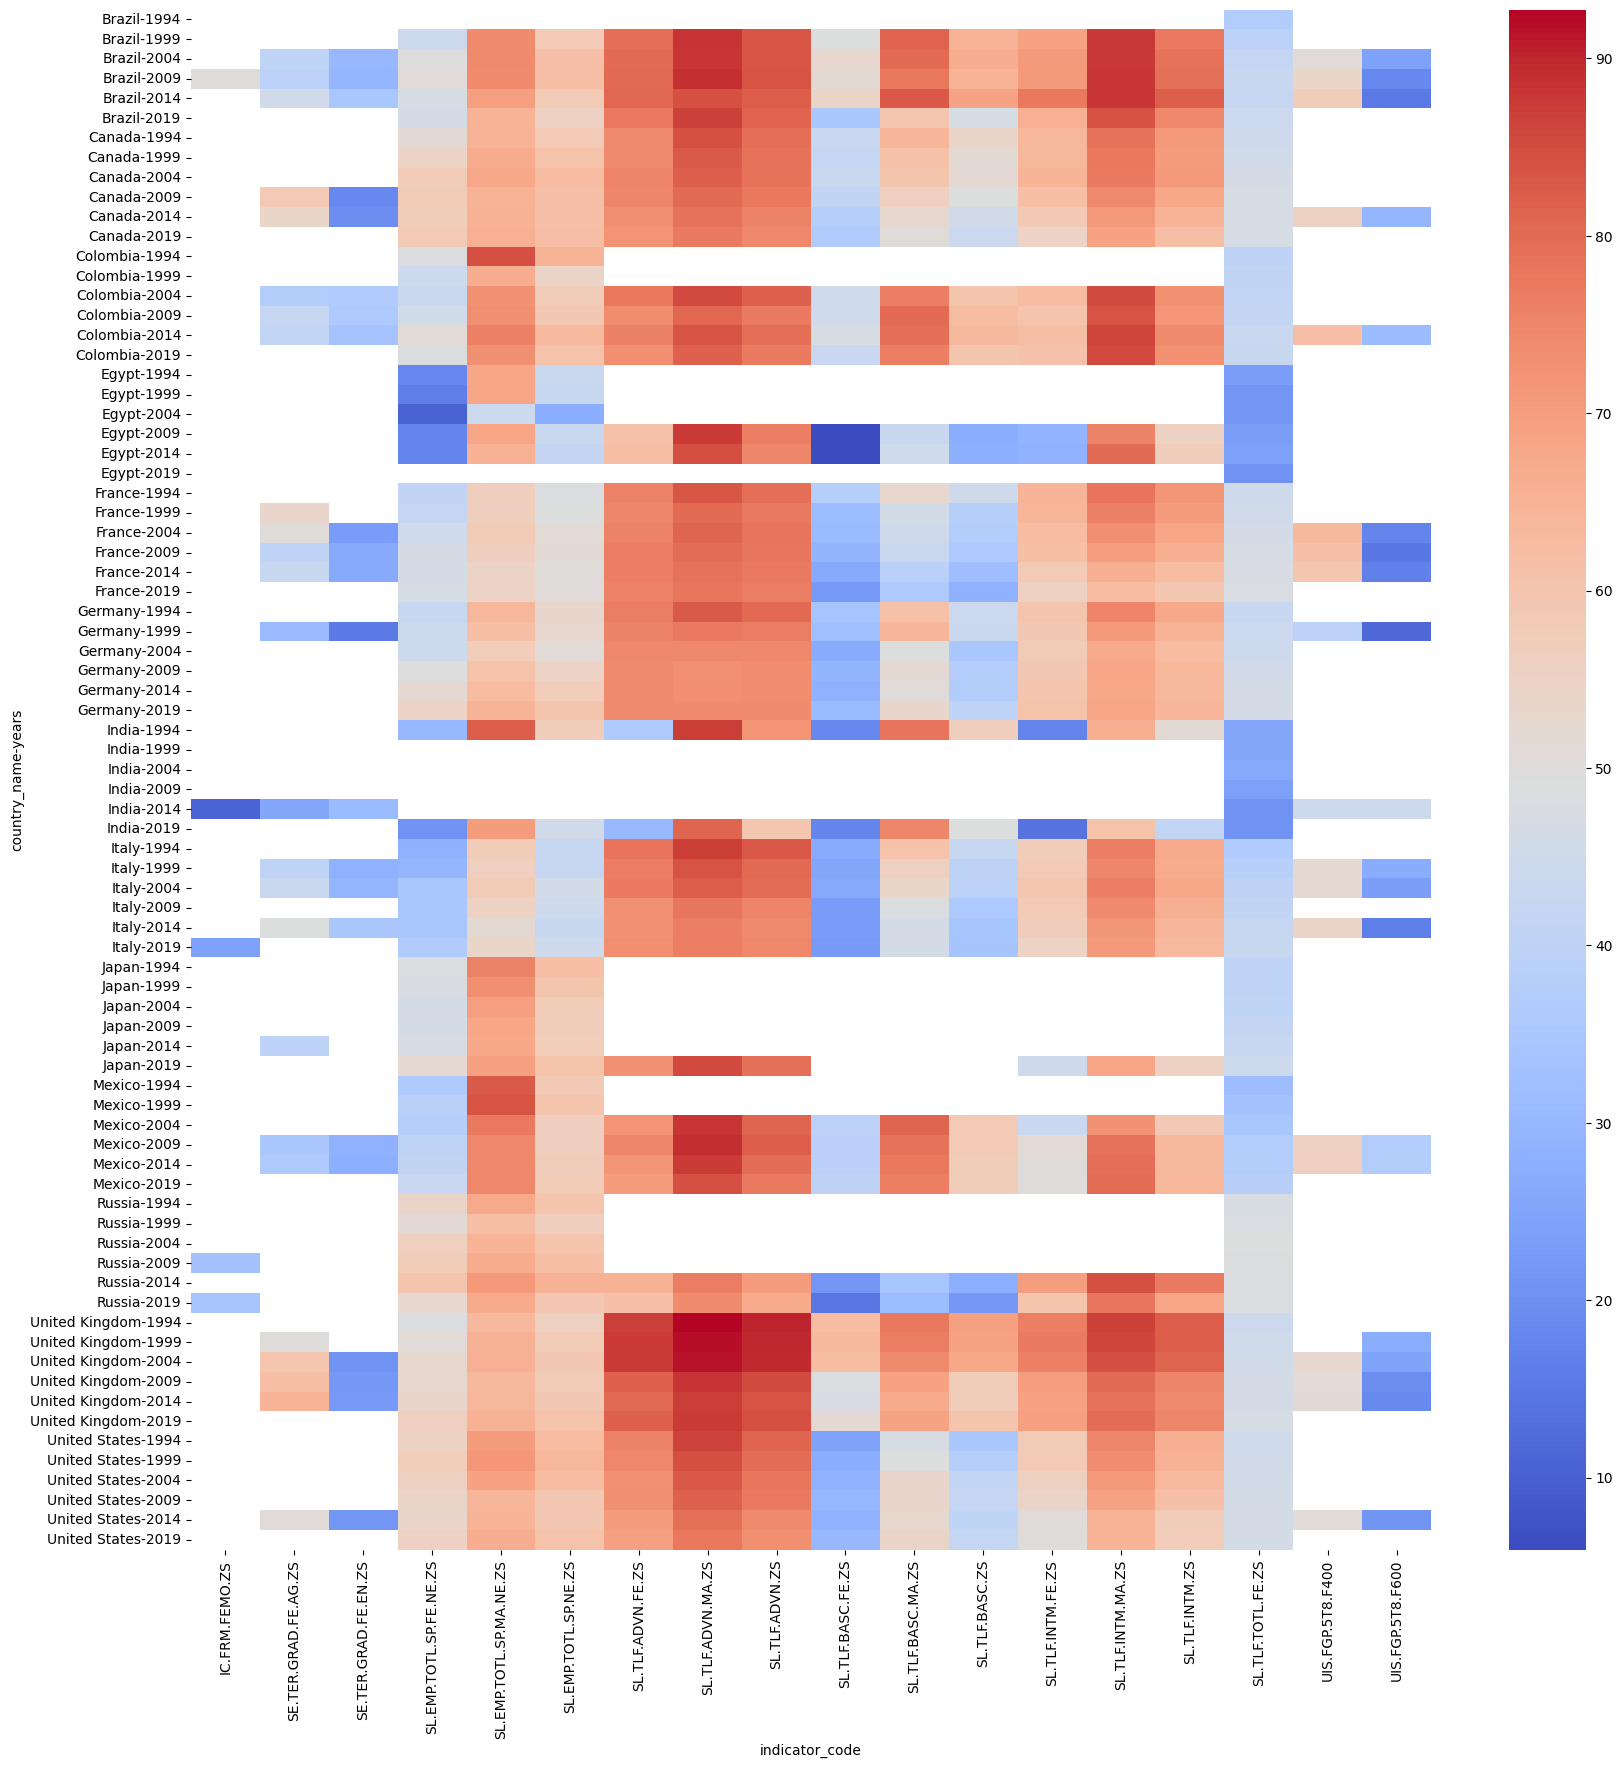

In [32]:
plt.figure(figsize=(20, 20)) # We can set the size using matplotlib
sns.heatmap(df_floats, cmap="coolwarm") # cmap defines the color palette

The heatmap shows the behavior of the percentage indicators over the years in the countries of interest. The graph shows a lot of missing data (white color). We can also see that the general trend for all indicators over the years is that we observe a slight decrease in all countries. In the countries of interest the percentage of male labor force with advanced and intermediate education (SL.TLF.ADVN.MA.ZS and SL.TL.INTM.MA.ZS) is quite marked since 1994.
The United Kingdom is the country with the highest percentage of the population with advanced education and working, both in women and men. The number of men in these countries with these characteristics has declined in the number of educated people. The total percentage of the female labor force (SL.TLF.TOTL.FE.ZS) does not exceed 50%. The percentage of women with basic education of working age (SL.TLF.BASC.FE.ZS), in general, is less than 70%. In Colombia, our country of greatest interest since 2004 is that the indices of female and male labor force (SL.TLF.ADVN.MA.ZS and SL.TLF.ADVN.FE.ZS) with advanced studies are seen in greater proportion in men than in women, although it is not a very significant difference; however, it would be interesting to investigate these variables to identify possible causes for the lower female labor force with advanced studies. Another variable that calls our attention is the total female labor force, which is quite low and in the field of technology and engineering women have very little participation, an explanation for this would be that women's interests in general are inclined to study other careers.
The female and male labor force with basic education has decreased, especially in women, where the index is quite low, which is transferred according to the graph to the fact that there are more women who are able to study until they finish high school, in men we observe that there are many more men in this situation, which translates into lower incomes for people who have little education, in Colombia we see that the tendency is the same, however the basic education level is clearly much higher in men than in women.

In [33]:
df_melted['years'] = df_melted['years'].astype('int')
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1872 non-null   object 
 1   indicator_name  1872 non-null   object 
 2   indicator_code  1872 non-null   object 
 3   years           1872 non-null   int64  
 4   value           1321 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 73.2+ KB


# Histograms to identify the frequencies per year in some indicators

Text(0, 0.5, 'Frequency')

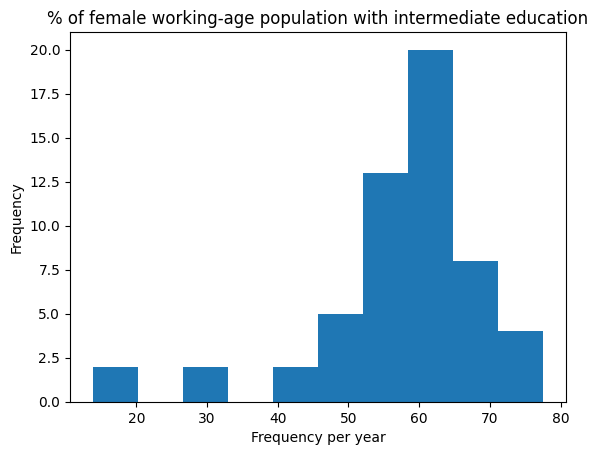

In [34]:
plt.hist(df_pivoted['SL.TLF.INTM.FE.ZS'])
plt.title(get_indicator_name('SL.TLF.INTM.FE.ZS'))
plt.xlabel("Frequency per year")
plt.ylabel("Frequency")

A percentage of around 60% of the working age female population with intermediate education can be observed, which is related to most countries. This distribution is skewed to the left of the interpretation and analysis graph. We can also distinguish how the lower percentage shows that at a very early age the female population is seeking employment, which may help us to indicate a possible increase in the female labor demand in the coming years.

Text(0, 0.5, 'Frequency')

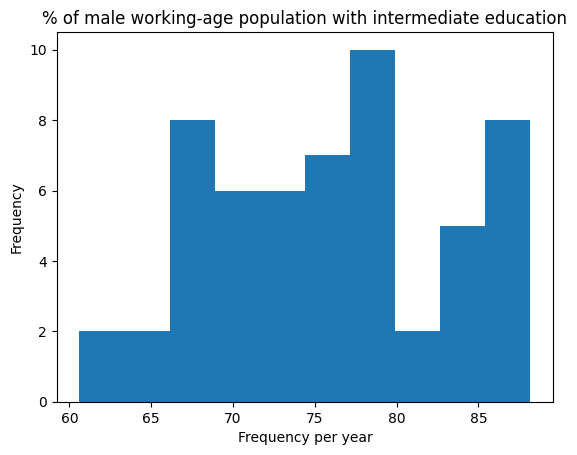

In [35]:
plt.hist(df_pivoted['SL.TLF.INTM.MA.ZS'])
plt.title(get_indicator_name('SL.TLF.INTM.MA.ZS'))
plt.xlabel("Frequency per year")
plt.ylabel("Frequency")

The % of the male population of working age, with intermediate education for most countries is between 65-80%, this distribution is not symmetric, unlike the previous graph, the range of the male population of working age is higher, due to the distribution of the data, it accumulates between 65-80% and for women the range is 60-70%

Text(0, 0.5, 'Frequency')

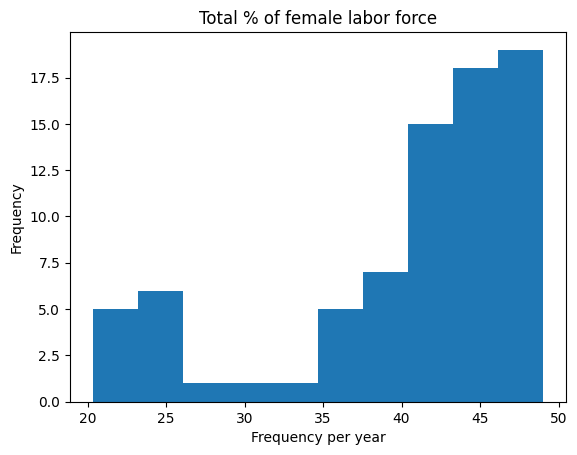

In [36]:
plt.hist(df_pivoted['SL.TLF.TOTL.FE.ZS'])
plt.title(get_indicator_name('SL.TLF.TOTL.FE.ZS'))
plt.xlabel("Frequency per year")
plt.ylabel("Frequency")

It can be observed that more than 50% of the female population is not part of the labor force in the world, since the data is below 50%. The majority is between 40%-49%. And it is likely that the peak between 20%-25% is due to India and Egypt, since in these countries the female labor force is overshadowed by machismo and the lack of cultural outreach so that women can acquire even a high school degree and be able to represent the labor force. While in the data sets where more female labor force increase is shown, they are related to developed and technologically distributive countries.

# Trend line charts of some indicators

Text(0, 0.5, 'Value')

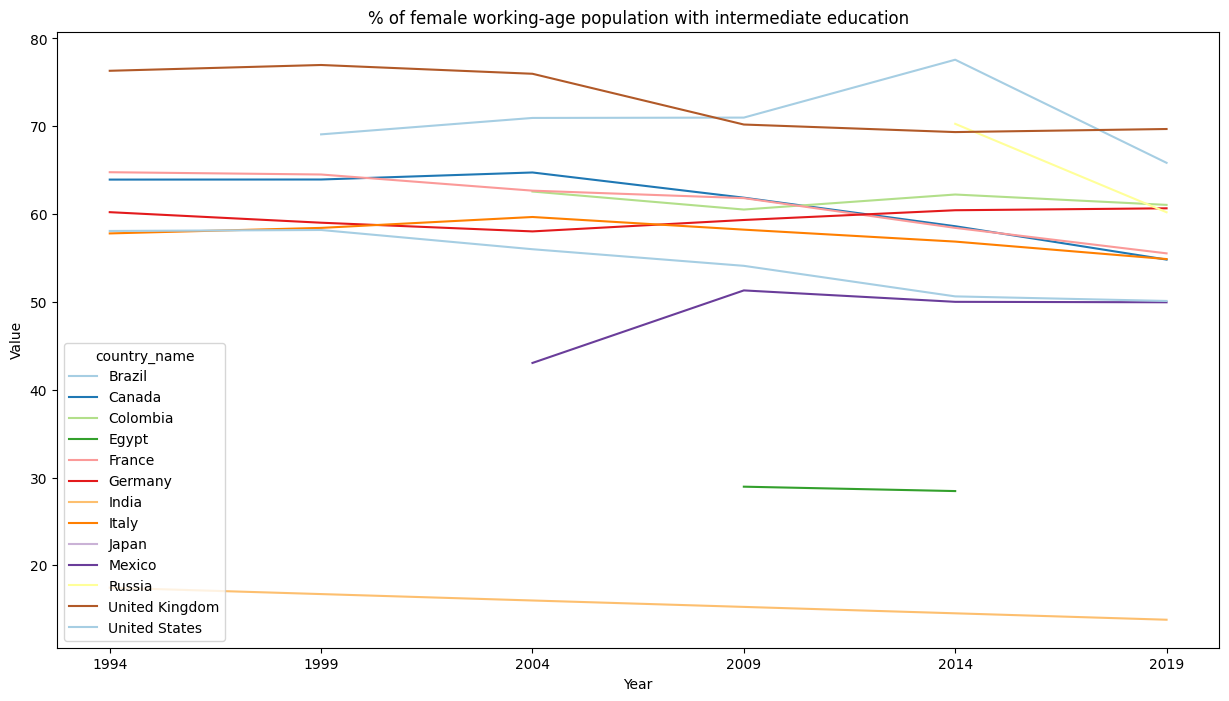

In [37]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.TLF.INTM.FE.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.TLF.INTM.FE.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

In line chart, we see the employment % of female population with intermediate education split by country. In general, we see a downward trend in each one of the countries that are part of the visualization. In united states we see a steady line from 1994 to 2004 then it fell from approximately 78% and fell below 70% in 2004 and then remained sort of steady.

For Brazil we see an upward trend that peaked in 2013-2014 and then fell from 78% to 65%.

A very distinct country is India which showed critical numbers and employment percent for women which are showing a deterioration from 1994 to 2019.

Colombia employment for females was falling steady and reach a bottom by 2004, it’s been recovering by then.


Text(0, 0.5, 'Value')

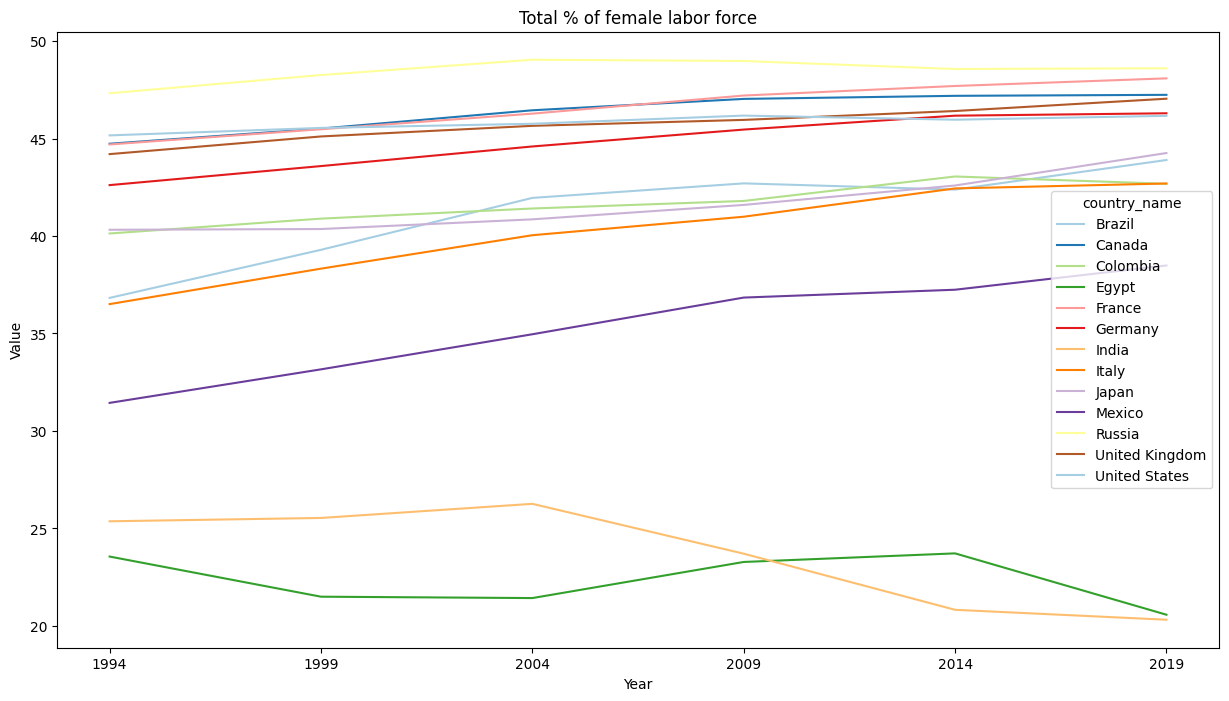

In [38]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.TLF.TOTL.FE.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.TLF.TOTL.FE.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

The percentage of the total female labor force in most countries shows an increase of around 5%, except for India and Egypt, which have decreased their labor force, especially Egypt, which from 2014 to 2019 decreased its female labor force by 5%; in these two countries the female labor force for 2019 is only 20%. The country with the highest growth in its female labor force was Mexico, with an increase of approximately 8%. Russia is the country with the largest female labor force, reaching almost 50% of its entire labor force. Colombia from 1994 to 2019 has not presented a large increase, since it has only increased its female labor force by about 3%, although in this time interval, it has not presented decreases either.

Text(0, 0.5, 'Value')

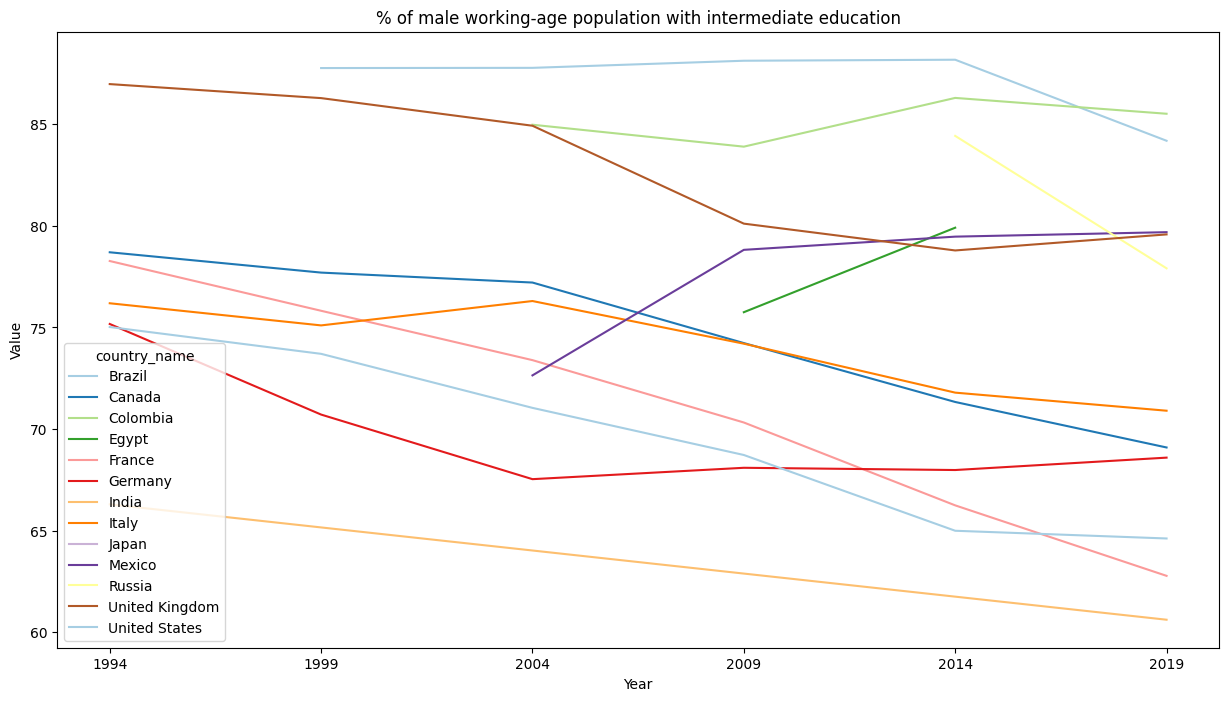

In [39]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.TLF.INTM.MA.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.TLF.INTM.MA.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

The percentage of the male population with intermediate education of working age has decreased for most of the countries, only Mexico and Egypt show increases in their records, possibly this increase in Egypt is due to the limited data available for this place, Mexico also does not have all the data for the years analyzed. Colombia maintains a constant percentage over the years. The country with the largest decrease is Canada, with a decrease of about 10%. India has the lowest percentage of men with intermediate education of working age, with a value of approximately 60%. Colombia is the country with the highest percentage of the male population with intermediate education of working age, exceeding 85%. Russia presents data exclusively for the years between 2014 and 2019 and represents a decrease of more than 5%.

Text(0, 0.5, 'Value')

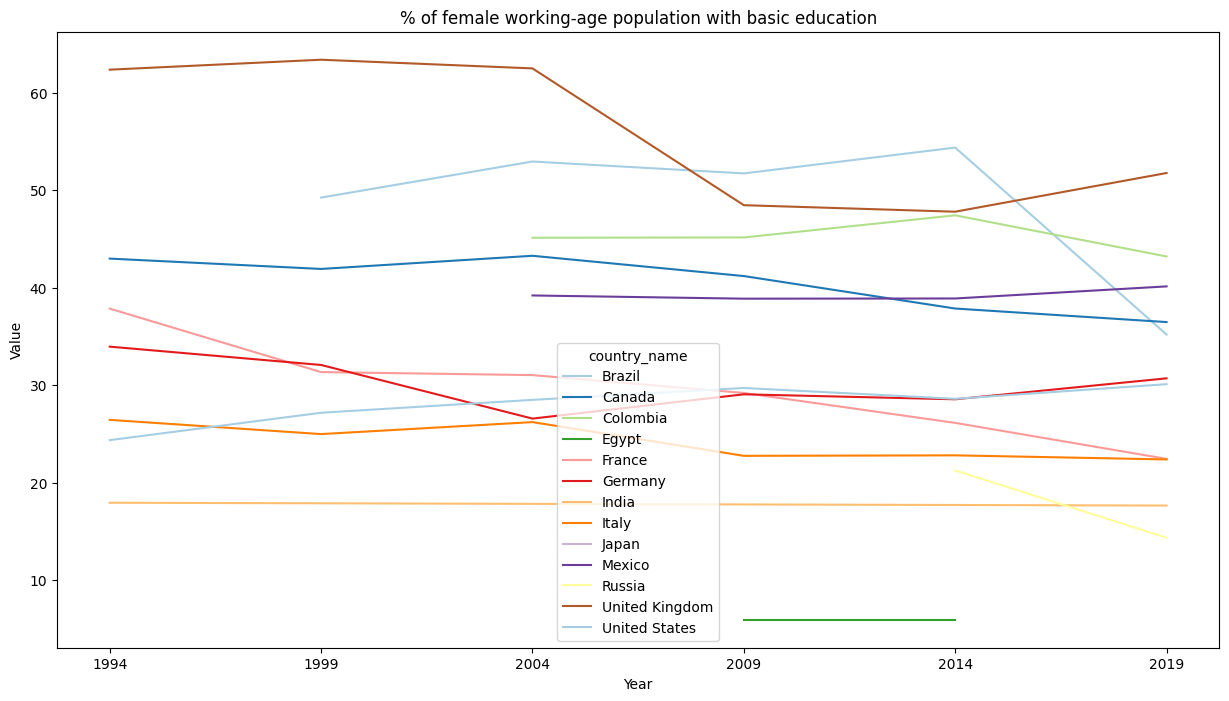

In [40]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.TLF.BASC.FE.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.TLF.BASC.FE.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

The percentage of the female population with basic education of working age has shown a considerable decrease mainly in European countries. In France, the percentage dropped from 38% to approximately 32% between 1994 and 1999, remained constant until 2009, but then dropped again until 2019. 
In Germany it has a tendency to fall to 28% in 2004 and thereafter until 2019 its percentage tends to rise to about 34%.
In Italy the changes do not seem to vary strongly; however, it maintains percentages between 24% and 27% approximately between 1994 and 2004, which are higher than in the following years, with percentages of 27% and decreasing to 22% approximately.
The United Kingdom maintains a percentage of over 60% between 1994 and 2004, from then until 2009 it drops to between 45% and 50%, remaining constant until 2014, when the percentage starts to rise gradually.
In some countries in the Americas, such as Canada, the percentage remains between 35% and 45% between 1994 and 2019, with the lowest percentages from 2004 onwards. In the United States, the percentage starts at approximately 25% and begins to increase to approximately 30% in 2009, varying over time, and in 2001 the percentage is 31%, being the highest peak during this time. In Mexico we can see data from 2004 starting at approximately 40% and rising to approximately 42% until 2019. And in Colombia the percentage increases from 2004 from 46% approximately to 49% approximately in 2014, thereafter and until 2019 the percentage drops to 41% approximately.
The countries that have shown the greatest changes over time in the percentage of the female population with basic education of working age are the United Kingdom, with a sharp drop in the percentage in 2004, and Brazil, which also began to fall sharply in 2014. 
The countries that show the greatest constancy in the percentage of the female population with basic education of working age during 1994 and 2019 in the Americas are Canada and the United States. In Europe, the most consistent are Germany and Italy.

Text(0, 0.5, 'Value')

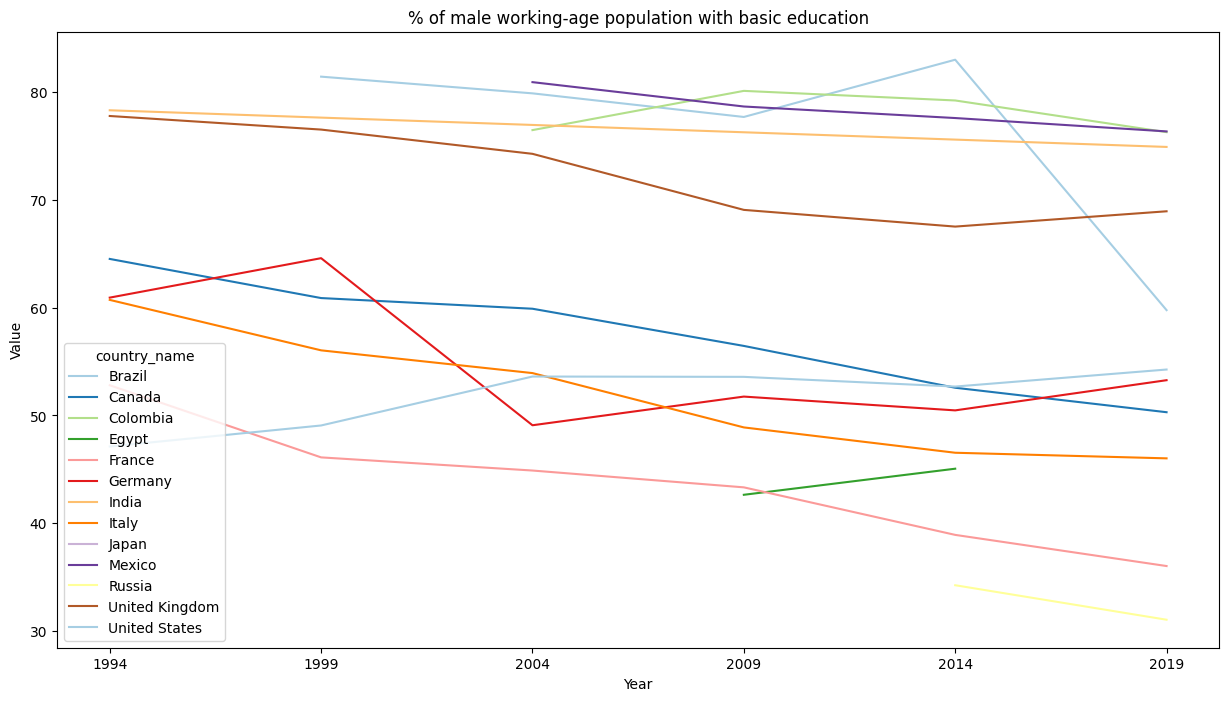

In [41]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.TLF.BASC.MA.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.TLF.BASC.MA.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

The percentage of the male population with basic education of working age tends to drop sharply in this period of time in European countries. In France, it starts with a percentage of about 55% and starts to decrease to about 47% by 1999, thereafter it remains fairly constant until 2009, when it starts to decrease to about 35%  in 2019. Germany starts at about 61% in 1994 and increases to about 65% in 1999, however it has a strong drop of up to 50% in 2004, presenting a more constant line with a tendency to increase up to 2019 by about 55%. Italy always shows a decrease during the whole period of time, starting at about 61% and decreasing every year as follows: for 1999 at 57%, for 2004 at 55%, for 2009 at 49%, for 2014 at 47%, and for 2019 at 46%. The United Kingdom also has a tendency to lower its percentage throughout the time, starting in 1994 at 77% and decreasing to 68% by 2014, with the exception of 2019, when the percentage increases from 68% to 70%.
For countries in the Americas such as Canada, the percentage of the male population with basic education of working age has a tendency to decrease throughout the period of time starting at 65% in 1994 and ending at 53% by 2019, although it tries to rise in 2004 to 63% but in the following years it has to decrease steadily. In Colombia we find data from 2004 with 76% of the male population with basic education of working age which increases to 79% approximately by 2009, and by 2019 it drops to 77%. Compared to these two countries, the case of the United States is different, which starts with a percentage of approximately 46% and increases throughout the period, in 2004 it reaches a percentage of 55% and remains stable until 2014, year in which and until 2019 it continues to increase to end with a percentage of approximately 58%.
The percentage of the male population with basic education of working age tends to decrease in most of the countries during the time period considered, except for the United States and Colombia, which show an increase in the percentage over time.

Text(0, 0.5, 'Value')

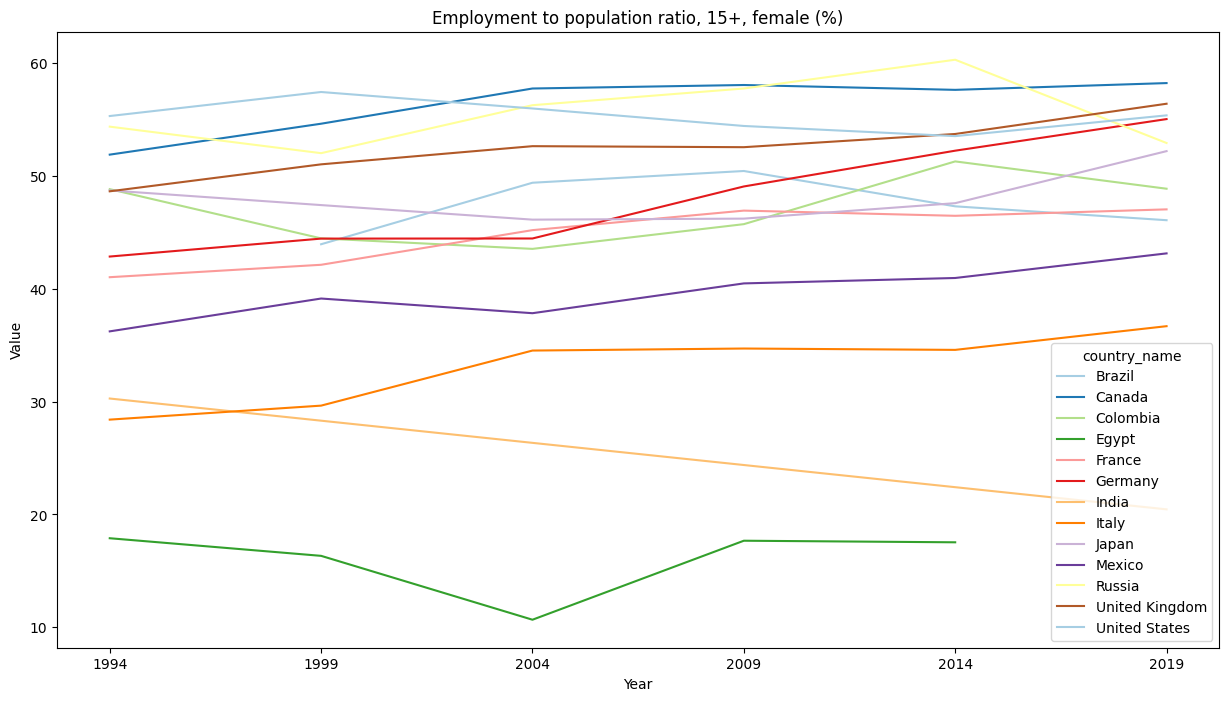

In [42]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='years', y='SL.EMP.TOTL.SP.FE.NE.ZS', hue='country_name', data=df_pivoted,palette = 'Paired')
plt.title(get_indicator_name('SL.EMP.TOTL.SP.FE.NE.ZS'))
plt.xlabel("Year")
plt.ylabel("Value")

We can observe that India is the only country that represents a considerable percentage decrease in the employability of women (about 10%); Colombia does not present a significant increase between its first and last record, however, its percentage varies a lot during the time, presenting increases and decreases through the years.
We can also observe that countries where economically we know that they are much more developed, such as Canada, Russia and the United States, remain in a much more stable variable than the other countries. We also analyze the countries with less labor income, such as Egypt, where many labor and economic trends do not allow women to be employed and now less women under 15 years old are employed.

# Matrix of correlation charts for various indicators

Text(0, 0.5, '-')

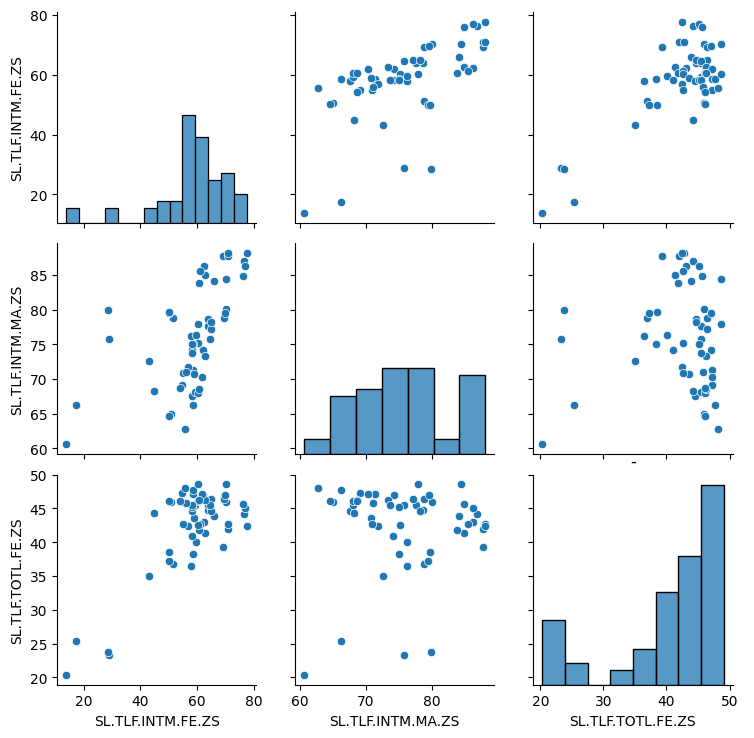

In [43]:
g = sns.PairGrid(df_pivoted[['SL.TLF.INTM.FE.ZS','SL.TLF.INTM.MA.ZS','SL.TLF.TOTL.FE.ZS']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.title("-")
plt.xlabel("-")
plt.ylabel("-")

The matrix shows that the percentage of the female labor force with intermediate education does not seem to have any significant correlation with the percentage of the male labor force with intermediate education. As the percentages of the female labor force with intermediate education increase, there is evidence of an increase in the total female labor force, as expected, these two indicators are significantly correlated. The increase or decrease of one value with respect to the other does not imply causality but rather the connection of both events. There is no correlation between the total female labor force with the percentage of the male labor force with intermediate education. The rest of the graphs do not seem to highlight or indicate significant correlations with any value, for future research. Comparing the frequency graph between the percentage of the female labor force with intermediate education and the percentage of the male labor force with intermediate education, it is observed that the majority of data for the female labor force with intermediate education is around 60%, while the percentage of the male labor force with intermediate education is around 80%, which means that there are more men with intermediate education working than women.

# Correlation matrix heat map for all the indicators

Text(120.7222222222222, 0.5, 'Indicator Code')

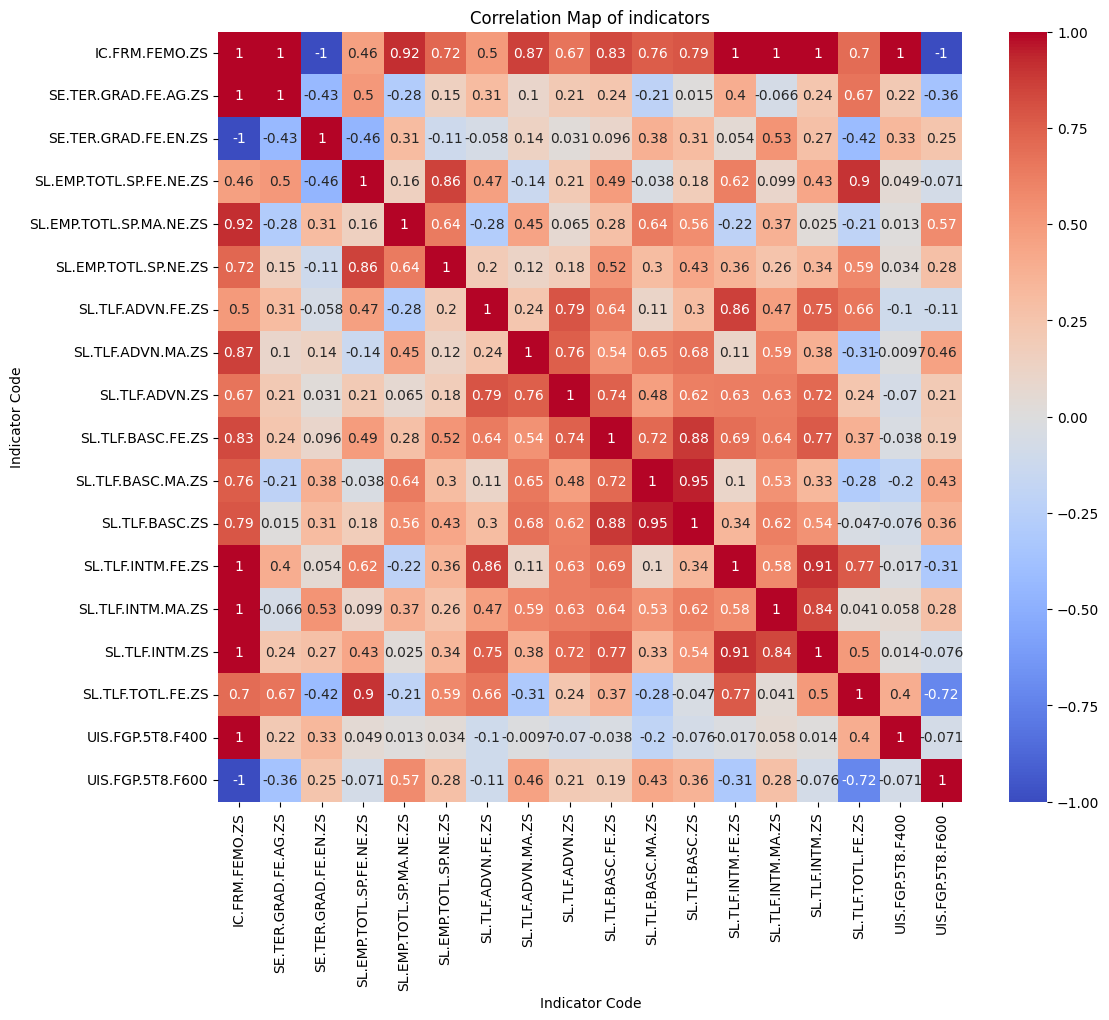

In [44]:
# correlation
corr_table = df_floats.corr()
# plot heatmap of correlation
plt.figure(figsize=(12, 10)) # We can set the size using matplotlib
sns.heatmap(corr_table, annot=True, cmap = "coolwarm")
plt.title("Correlation Map of indicators") # Adding a title
plt.xlabel("Indicator Code")
plt.ylabel("Indicator Code")

With this correlation matrix, we can identify which variables are linearly and proportionally related to each other (It is not necessary that there is a causality between them), it means, if one increases, and the correlation value is positive and near to 1, the other will also increase. The closer the value is to 1, the more related they are.
For example, it can be seen how IC.FRM.FEMO.ZS (Firms with female participation in ownership (% of firms)), has a correlation of 1 or very close to 1, with:
UIS.FGP.5T8.F400 (Female share of graduates in Business, Administration and Law programs); 
SL.TLF.INTM.ZS, SL.TLF.INTM.FE.ZS, SL.TLF.INTM.MA.ZS (Labor force with intermediate education general, for females and for males);
SE.TER.GRAD.FE.AG.ZS (Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes) and SL.EMP.TOTL.SP.MA.NE.ZS (Employment to population ratio 15+ male (%)).
Also, IC.FRM.FEMO.ZS (Firms with female participation in ownership (% of firms))have a negative correlation (i.e. while one of the variables increases, the other decreases), with: 
UIS.FGP.5T8.F600 (Female share of gra
duates in Information and Communication Technologies programs) and
SE.TER.GRAD.FE.EN.ZS(Female share of graduates in Engineering, Manufacturing and Construction programmes).

An other indicator, that has a correlation value, close to 1 or -1, with multiple indicators is SL.EMP.TOTL.SP.FE.NE.ZS (Female 15+ employment to population ratio), 
Its correlation value very close to 1 is with: 
SE.TER.GRAD.FE.EN.ZS(Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes), SL.TLF.INTM.FE.ZS (Female labor force with intermediate education) with a correlation value = 0,62 and 
SL.EMP.TOTL.SP.NE.ZS (Total 15+ employment to population ratio) with a correlation value = 0,86.
This will allow us to analyze in the other stages of the project, these relationships in more depth and if there really is a causality between the two.


# Graphs with additional databases

## Gini coefficient
#### Measures income inequality in a population. It is a number between 0 and 1, where 0 corresponds to perfect equality (everyone has the same income) and where the value 1 corresponds to perfect inequality (one person has all the income and the others have none). 

<ipython-input-45-7a73c7d6441f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparados["ColValues"] = colombia_df.iloc[3:10]["Value"].tolist()
<ipython-input-45-7a73c7d6441f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparados["RussiaValues"] = russia_df.iloc[2:9]["Value"].tolist()
<ipython-input-45-7a73c7d6441f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

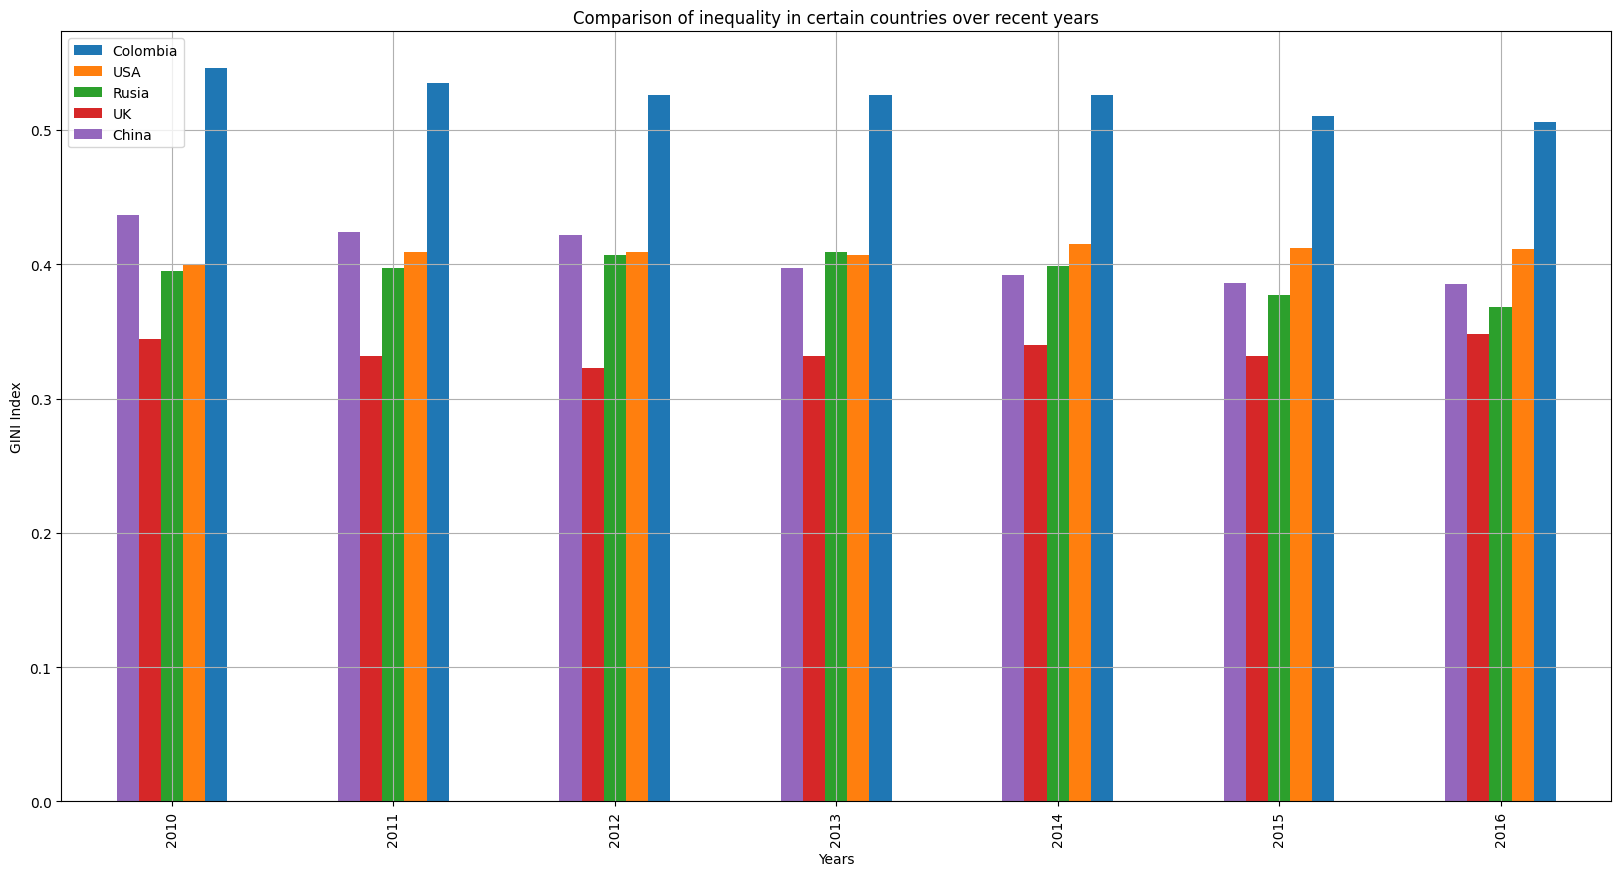

In [45]:
#We first create a database processed individually by country
colombia_df = df_gini.loc[df_gini['Country or Area'] == "Colombia"][{"Value","Year"}]
russia_df = df_gini.loc[df_gini['Country or Area'] == "Russia"][{"Value","Year"}]
usa_df = df_gini.loc[df_gini['Country or Area'] == "United States"][{"Value","Year"}]
uk_df = df_gini.loc[df_gini['Country or Area'] == "United Kingdom"][{"Value","Year"}]
china_df = df_gini.loc[df_gini['Country or Area'] == "China"][{"Value","Year"}]


# We create a compilation database that combines the previous tables
df_comparados = usa_df.iloc[2:9]
df_comparados["ColValues"] = colombia_df.iloc[3:10]["Value"].tolist()
df_comparados["RussiaValues"] = russia_df.iloc[2:9]["Value"].tolist()
df_comparados["UkValues"] = uk_df.iloc[1:8]["Value"].tolist()
df_comparados["ChinaValues"] = china_df.iloc[:7]["Value"].tolist()

#We scale the values to categorize the GINI results for a range from 0 to 1
OldMax = 100 #max(max(df_comparados["Value"]),max(df_comparados["ColValues"]),max(df_comparados["RussiaValues"]),max(df_comparados["UkValues"]),max(df_comparados["ChinaValues"]))
OldMin = 0 #min(min(df_comparados["Value"]),min(df_comparados["ColValues"]),min(df_comparados["RussiaValues"]),min(df_comparados["UkValues"]),min(df_comparados["ChinaValues"]))
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

# We create lists with the data scaled to the compilation database
lstUsaScalated = []
lstColScalated = []
lstRusScalated = []
lstUkScalated = []
lstChinScalated = []                                                               
for i in df_comparados["Value"]:
    lstUsaScalated.append((((i - OldMin) * NewRange) / OldRange) + NewMin)
for i in df_comparados["ColValues"]:
    lstColScalated.append((((i - OldMin) * NewRange) / OldRange) + NewMin)
for i in df_comparados["RussiaValues"]:
    lstRusScalated.append((((i - OldMin) * NewRange) / OldRange) + NewMin)
for i in df_comparados["UkValues"]:
    lstUkScalated.append((((i - OldMin) * NewRange) / OldRange) + NewMin)
for i in df_comparados["ChinaValues"]:
    lstChinScalated.append((((i - OldMin) * NewRange) / OldRange) + NewMin)
                                                                             
# We add them to the compilation database
df_comparados["USA"] = lstUsaScalated
df_comparados["Colombia"] = lstColScalated
df_comparados["Rusia"] = lstRusScalated
df_comparados["UK"] = lstUkScalated
df_comparados["China"] = lstChinScalated
                                                                             
# We graph visualization type bars
df_comparados.plot.bar(x = "Year" , y= ["Colombia","USA","Rusia","UK","China"],grid = True, figsize=(20, 10),title = "Comparison of inequality in certain countries over recent years", xlabel = "Years", ylabel = "GINI Index").invert_xaxis()

The Gini coefficient is one of the metrics used to guide us with respect to economic inequality. The higher the Gini index, the greater the income inequality in the population. That is, a few people earn more than the rest of the population. We can observe the deviation of income distribution in Colombia, USA, Russia, UK, and China from 2010 to 2016. Here it can be seen that Colombia occupies the first place in inequality ranking between the years mentioned, while the last country is UK as it has a lower inequality index.
The evolution of the Gini index for these years and in these countries explores the behavior of the economic and social development of the countries and even regions where these nations are located. For this indicator, the capacity to offer low inequality is better in developed and first world countries, as is the case of the United Kingdom. On the other hand, the case of China reflects the economic evolution of the country in recent years. This index reflects how the political, social, and economic landscape of a nation affects equality and access to economic wealth. Demonstrating how close one country really is to the other in terms of quality of life and raw power.

Text(0.5, 1.0, 'Women between 15 and 24 years old, employed during the years presented')

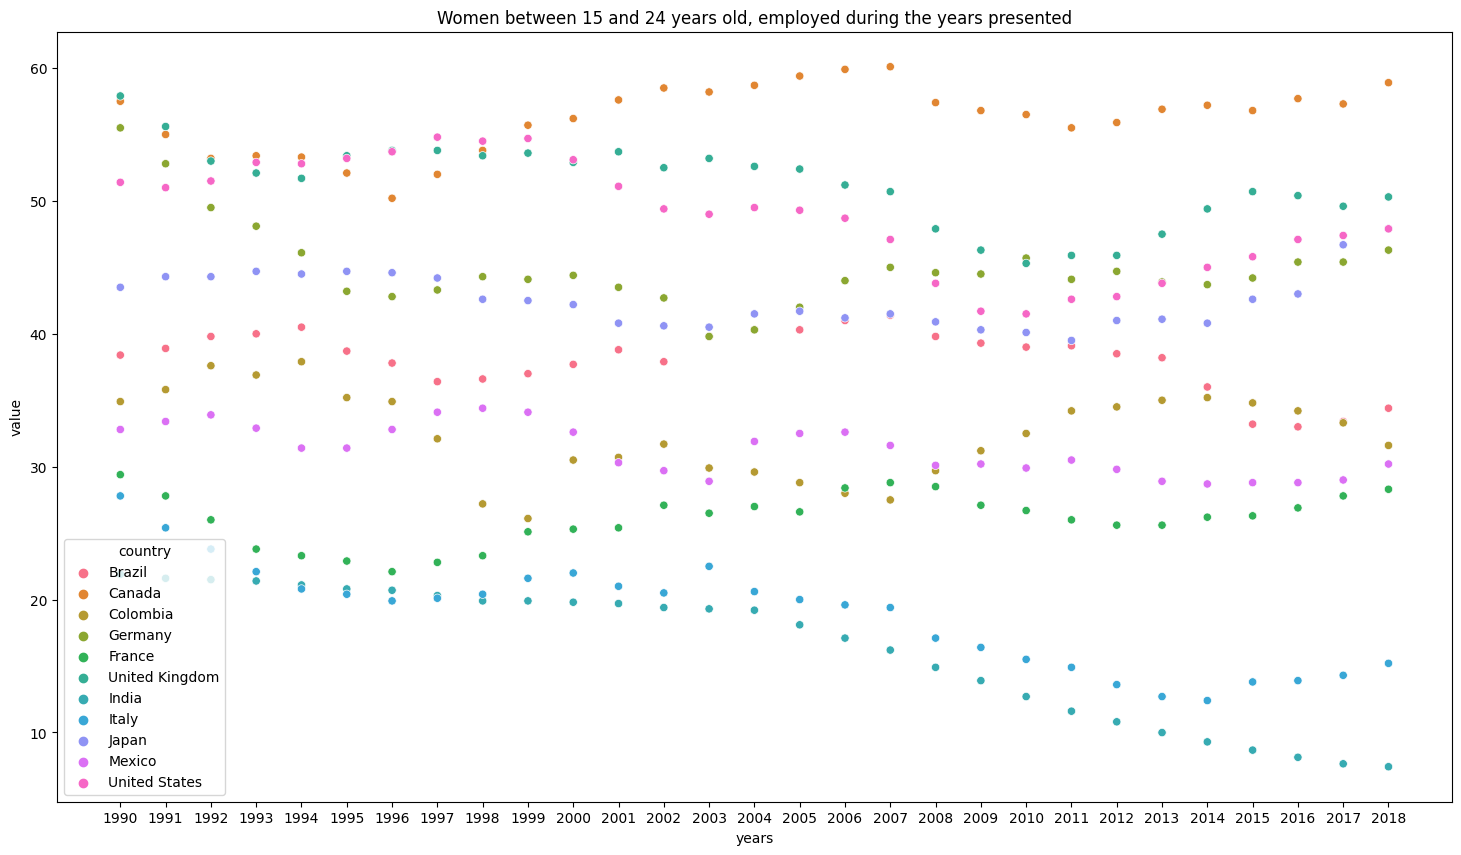

In [46]:
#Generation of graph: women between 15 and 24 years old, employed during the years presented
df_1=pd.read_csv("females_aged_15_24_employment_rate_percent.xlsx - females_aged_15_24_employment_r.csv")
df_1 = df_1.loc[df_1["country"].isin(countries)]
df_1[df_1.columns[1:]] = df_1[df_1.columns[1:]].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce'))
df_1 = pd.melt(df_1,id_vars=["country"],var_name='years')

employment_country = plt.figure(figsize = (18, 10))
sns.scatterplot(x='years', y='value', data=df_1, hue = "country")
plt.title("Women between 15 and 24 years old, employed during the years presented")

The scatterplot shows us that the countries in which the highest number of women between 15 and 24 years old are employed are: Canada, United States and United Kingdom, with a trend of 40% and above. The countries with the lowest number of employed women between the ages of 15 and 24 would be India, Italy, France and Colombia with a trend of less than 30%.
In all countries this has varied constantly, but in recent years Canada has shown the greatest increase in the employability of women between 15 and 24 years old, maintaining a growing trend and strengthening opportunities for women to start working.

Text(0.5, 1.0, 'Behavior of employability in women aged 15 to 24 in Colombia over the years')

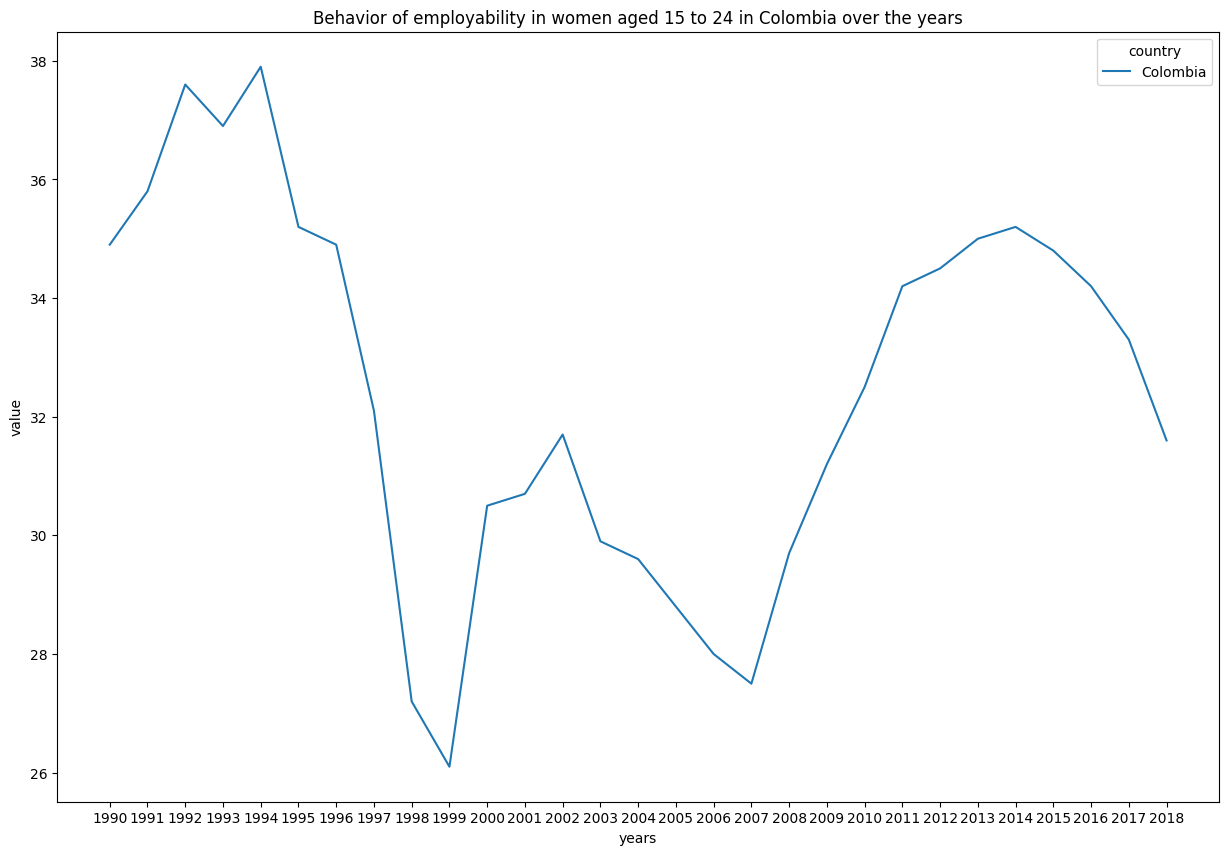

In [47]:
#Behavior of employability in women aged 15 to 24 in Colombia over the years
df_2 = df_1.loc[df_1["country"] == "Colombia"]
fig = plt.figure(figsize = (15, 10))
sns.lineplot(x='years', y='value', data=df_2, hue = "country")
plt.title("Behavior of employability in women aged 15 to 24 in Colombia over the years")

The behavior of the employability of women between 15 and 24 years old in Colombia over the years shows its highest peak between 1992 and 1995 with a percentage between 37.8% and 38%, one of the best years for female employability in Colombia in the 15 to 24 age group, This was one of the best years for female employability in Colombia in the 15 to 24 age group. However, for these women who are just beginning their working lives, their opportunities seem to drop sharply until 1999, when the percentage of employability for them was 26%, and although it tries to increase until 2002 with a percentage of approximately 32%, it drops again to 27% in 2007, with fewer women between 15 and 24 years old employed in Colombia. In the following years female employability in these ages gradually gains strength again until 2014 with a percentage of 35.6% approximately and starts to drop by 2018 between 30 and 32%. 
Between these years, Colombia never surpassed or reached its best peak in 1992 and 1995.

Text(0.5, 1.0, 'Employed people between the ages of 15 and 24 during the years presented, in different countries')

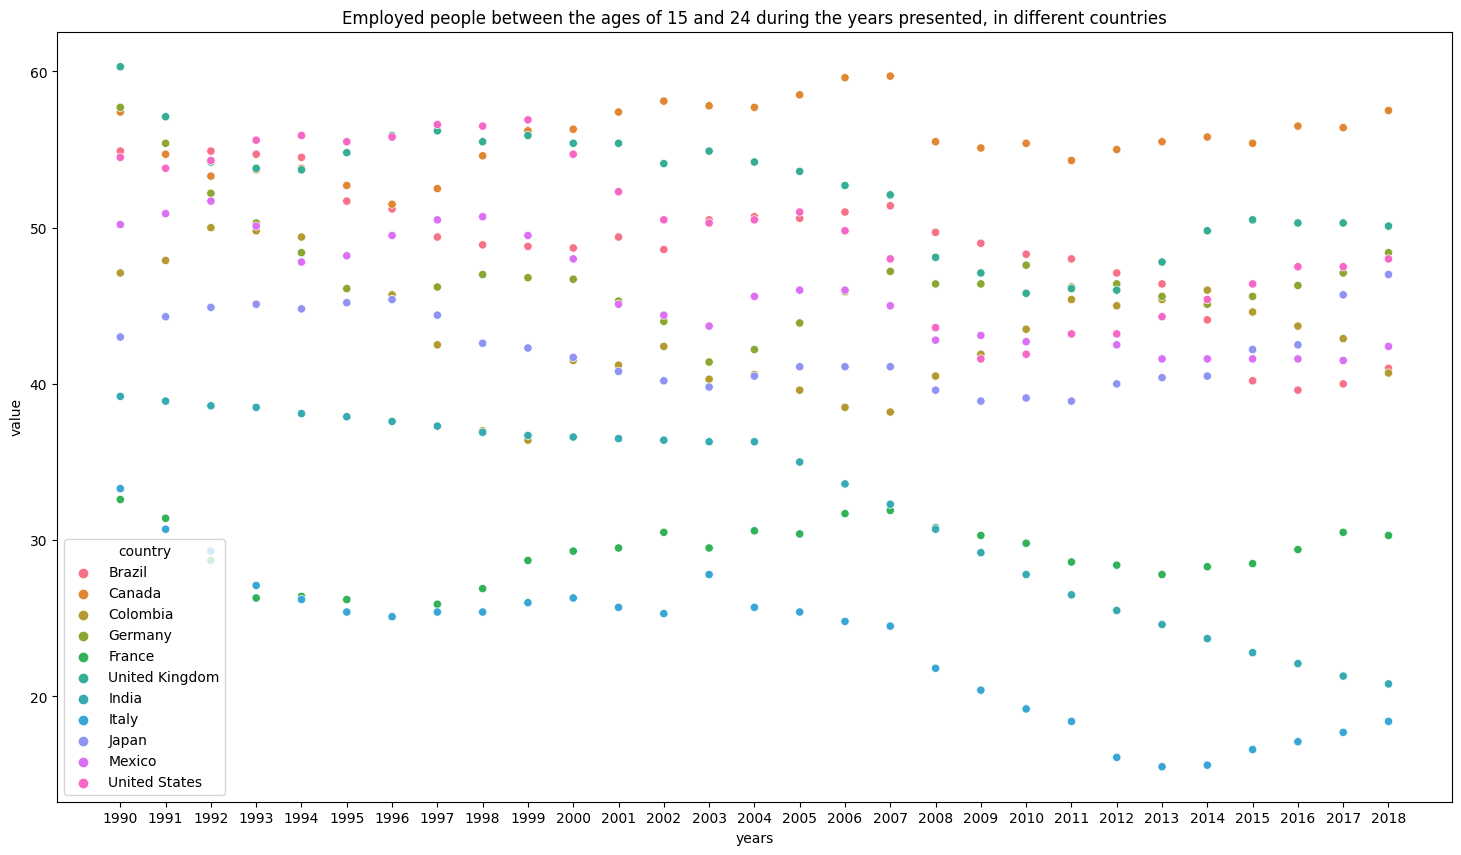

In [48]:
#Employed people between the ages of 15 and 24 during the years presented, in different countries
df_3 = pd.read_csv("aged_15_24_employment_rate_percent.xlsx - aged_15_24_employment_rate_perc.csv")
df_3 = df_3.loc[df_3["country"].isin(countries)]
df_3[df_3.columns[1:]] = df_3[df_3.columns[1:]].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce'))
df_4 = pd.melt(df_3,id_vars=["country"],var_name='years')
fig = plt.figure(figsize = (18, 10))
sns.scatterplot(x='years', y='value', data=df_4, hue = "country")
plt.title("Employed people between the ages of 15 and 24 during the years presented, in different countries")

The scatterplot analyzes the countries from highest to lowest by relating the number of employed women between the ages of 15 and 24.
We can see that Canada, the United States and the United Kingdom have an accelerating trend from 40% onwards. The countries with the lowest number of employed women between 15 and 24 years of age are India, Italy, France and Colombia, with a trend of less than 30%.
It should be clarified that in all countries this has varied constantly, but in recent years Canada shows the greatest increase in the employability of women between 15 and 24, in addition this country provides greater benefits when generating jobs; this leads us to face a greater growth in employability both in general and especially in the female force.

Text(0.5, 1.0, 'Behavior of the employability of people in Colombia during the years presented')

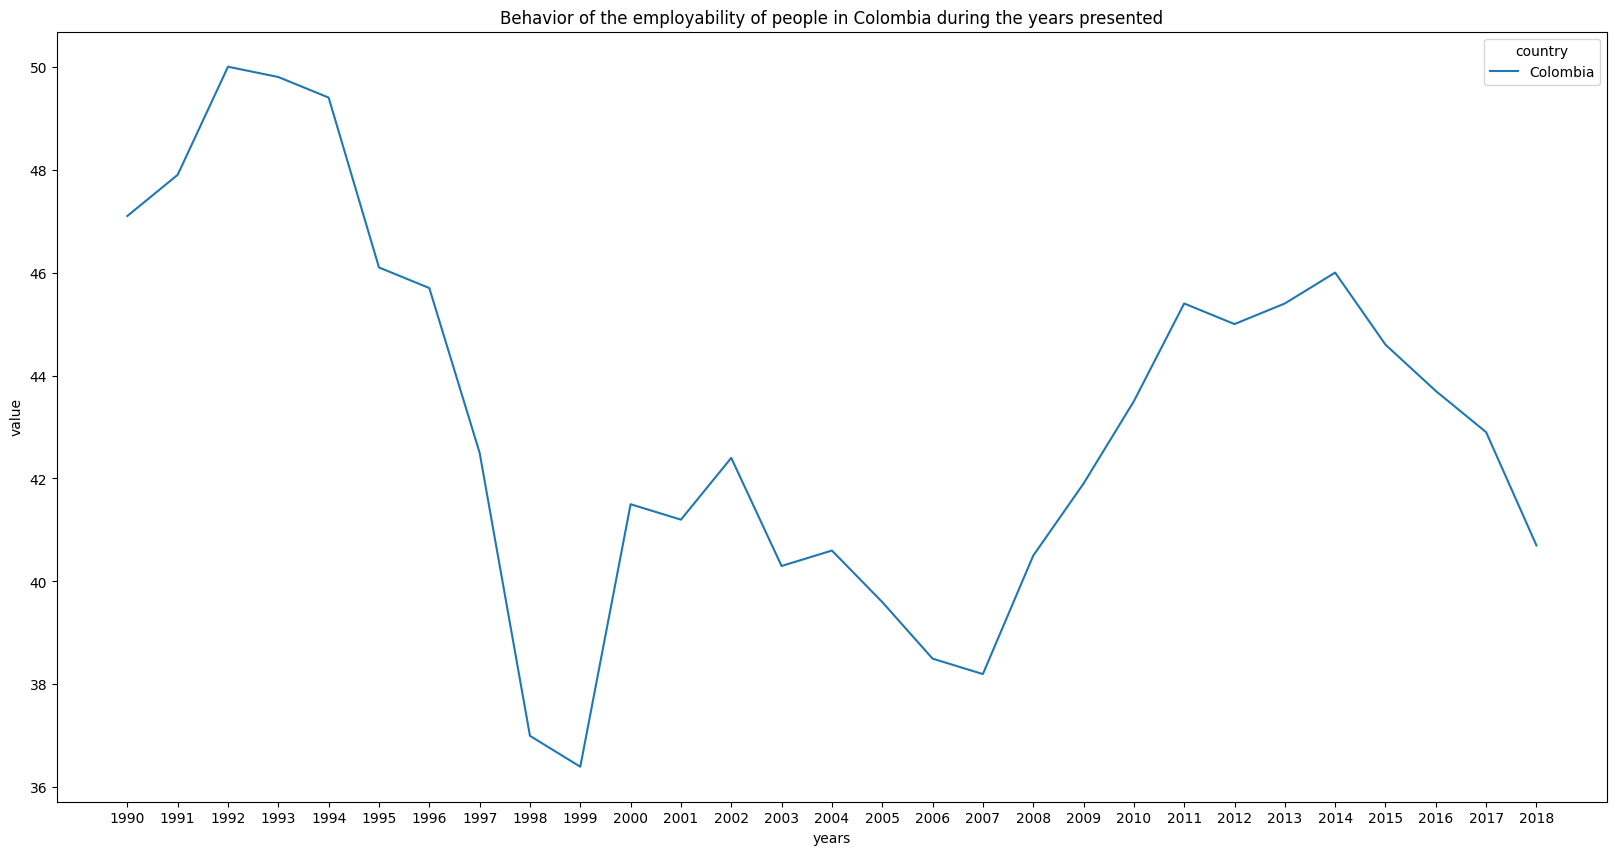

In [49]:
#Behavior of the employability of people in Colombia during the years presented
df_5 = df_3.loc[df_3["country"] == "Colombia"]
df_5 = pd.melt(df_5,id_vars=["country"],var_name='years')
fig = plt.figure(figsize = (20, 10))
sns.lineplot(x='years', y='value', data=df_5, hue = "country")
plt.title("Behavior of the employability of people in Colombia during the years presented")

Analyzing the employed people between 15 and 24 years old in Colombia, we can observe that in the 90s it has its greatest growth in employability, where we can also observe that it is the beginning of the labor world for this age.
On the other hand, we can observe that by changing the century, this changed and decreased to less employability at different ages. This may occur due to the technological and economic change that has developed during this period.

# Unsupervised Model Application

In [50]:
#Libraries for different models
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from mpl_toolkits.mplot3d import Axes3D

# kmodes.kprototypes Library

In [51]:
#https://kprototypes.readthedocs.io/en/latest/api.html
# kmodes.kprototypes library, allows combined data type float and categoric
#Installing kmodes and stasmodels
!pip install kmodes
!pip install statsmodels --user
from kmodes.kprototypes import KPrototypes
from pylab import rcParams #Library for charts size
from sklearn import preprocessing #Library for transforming data

In [52]:
rename_dict = {'HD.HCI.OVRL':'hc_index','HD.HCI.OVRL.FE':'hci_women','HD.HCI.OVRL.MA':'hci_men','IC.FRM.FEMO.ZS':'women_owner',
'SE.TER.GRAD.FE.AG.ZS':'women_agri','SE.TER.GRAD.FE.EN.ZS':'women_eng','SG.BUS.REGT.EQ':'register_buss_woman',
'SG.DML.PRGW':'pregnant_prohib', 'SG.GET.JOBS.EQ':'women_get_job', 'SG.HLD.HEAD.EQ':'women_household', 'SG.IND.WORK.EQ':'industrial_women',
'SI.POV.GINI':'gini_index','SL.EMP.TOTL.SP.FE.NE.ZS':'women_employ_ratio','SL.EMP.TOTL.SP.MA.NE.ZS':'men_employ_ratio',
'SL.EMP.TOTL.SP.NE.ZS':'employ_ratio_total', 'SL.TLF.ADVN.FE.ZS':'advanced_women', 'SL.TLF.ADVN.MA.ZS':'advanced_men',
'SL.TLF.ADVN.ZS':'advanced_studies', 'SL.TLF.BASC.FE.ZS':'basic_women', 'SL.TLF.BASC.MA.ZS':'basic_man',
'SL.TLF.BASC.ZS':'basic_studies', 'SL.TLF.INTM.FE.ZS':'intermediate_women', 'SL.TLF.INTM.MA.ZS':'intermediate_man',
'SL.TLF.INTM.ZS':'intermediate_studies', 'SL.TLF.TOTL.FE.ZS':'force_women', 'UIS.FGP.5T8.F400':'woman_bussines',
'UIS.FGP.5T8.F600':'woman_tech'}

In [53]:
#Making a new df, using only float indicators, and changing its columns names
df_model = df_floats.rename(columns=rename_dict)
#Making a linear interpolation to fill null-values
df_model= df_model.interpolate(method='linear',implace=True)
#Dropping the null data that could remain after the linear interpolation
df_model = df_model.dropna()

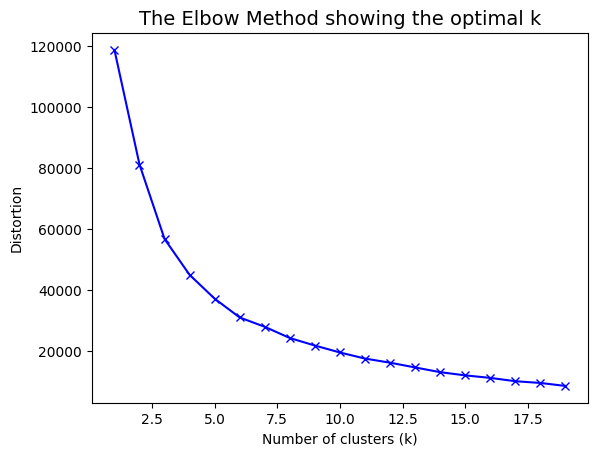

In [54]:
# Determining the number of Clusters
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_model)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k', fontsize=14)
plt.show()

In [55]:
#Resetting indexes in the df to change de data type specified bellow
df_model = df_model.reset_index()
#Changing the data type of country_name and years, to category (To apply KPrototypes)
df_model [['country_name','years']] = df_model[['country_name','years']].astype('category')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country_name          75 non-null     category
 1   years                 75 non-null     category
 2   women_owner           75 non-null     float64 
 3   women_agri            75 non-null     float64 
 4   women_eng             75 non-null     float64 
 5   women_employ_ratio    75 non-null     float64 
 6   men_employ_ratio      75 non-null     float64 
 7   employ_ratio_total    75 non-null     float64 
 8   advanced_women        75 non-null     float64 
 9   advanced_men          75 non-null     float64 
 10  advanced_studies      75 non-null     float64 
 11  basic_women           75 non-null     float64 
 12  basic_man             75 non-null     float64 
 13  basic_studies         75 non-null     float64 
 14  intermediate_women    75 non-null     float64 
 15  intermed

In [56]:
#Selecting the categorical columns (country_name and years)
categorical_features_idx = [0, 1]

In [82]:
#Selecting the values in de DF
values_array=df_model.values

In [103]:
#We first did not added the random state and we realize that our prediction was changing every run. So, we made a research
#and we found that this seed could be stablished
#Fitting the data: n_clusters:Determined by the Elbow Method, max_iter:Number of max iterations to fit, random_state: A constant seed to train the model 
# . fit(numerical_values, categorical_values)
np.random.seed(2022)

In [104]:
kproto = KPrototypes(n_clusters=5, max_iter=30,random_state=2022).fit(values_array, categorical=categorical_features_idx) 

In [105]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['32.640439189189195' '39.25037774074074' '30.636663363636373'
  '44.96866709333334' '74.56733245800002' '59.04533284533332'
  '73.3502230836' '84.69580000108887' '79.03435368871108'
  '39.60234086128889' '73.68014767684444' '56.01168854441481'
  '52.751488798222226' '77.59442216615557' '64.59579940757779'
  '39.750599096666654' '57.489141913131306' '32.30819562424243' '0.0'
  'Colombia' '1994']
 ['12.795945945945952' '27.390971851851877' '27.858951851851838'
  '25.360000610000018' '76.314998625' '51.215000149999945'
  '33.27499961499999' '84.11499785999999' '66.04999923499992'
  '17.795000075000022' '76.61000061' '52.84500121999997'
  '15.634999750000011' '63.45000076500003' '46.38999938500001'
  '23.6684819383333' '44.04583518518516' '37.22540111111109' '1.0'
  'India' '1994']
 ['28.211422413793102' '44.357381245210725' '23.58933660222918'
  '50.76896509620689' '64.36896580586208' '57.308276209655155'
  '72.67367853641377' '79.10165577271265' '75.77843591032185'
  '28.68499622312644

In [106]:
# Prediction 
clusters = kproto.predict(values_array, categorical=categorical_features_idx)

In [107]:
#Adding the column Clusters to the df_model
df_model['cluster'] = list(clusters)

### The percentage of  female, male and total population with advanced education in working age is analyzed using the 5 clusters that we chose according to the elbow method.

In [108]:
df_model[df_model['cluster']==0].head(15)

indicator_code,country_name,years,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,...,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
9,Colombia,1994,40.591892,45.615010,27.907900,48.820000,84.449997,65.019997,73.963333,80.133336,...,39.353334,59.023333,49.320001,57.403333,74.386665,65.646667,40.128766,57.807633,30.099350,0
10,Colombia,1999,39.524324,41.434115,32.257380,44.459999,66.400002,54.410000,75.826668,82.856669,...,42.236666,67.746667,54.850001,59.986666,79.683334,69.303333,40.890346,58.871505,30.341665,0
11,Colombia,2004,38.456757,37.253220,36.606860,43.529999,72.519997,57.540001,77.690002,85.580002,...,45.119999,76.470001,60.380001,62.570000,84.980003,72.959999,41.410485,59.935377,30.583980,0
12,Colombia,2009,37.389189,42.554110,35.629710,45.720001,73.269997,59.049999,73.739998,80.779999,...,45.150002,80.110001,62.410000,60.520000,83.900002,71.639999,41.797535,60.999248,30.826295,0
13,Colombia,2014,36.321622,41.279770,33.679680,51.279999,75.989998,63.230000,75.839996,83.910004,...,47.419998,79.220001,63.259998,62.230000,86.300003,73.879997,43.052586,62.063120,31.068610,0
14,Colombia,2019,35.254054,42.661491,32.586060,48.860001,73.389999,60.759998,73.410004,81.610001,...,43.200001,76.279999,59.990002,61.049999,85.519997,72.790001,42.677437,62.197322,29.680548,0
49,Japan,2014,26.843750,39.563380,31.293612,47.580002,67.730003,57.310001,72.683334,84.014997,...,31.724444,65.408888,47.553333,46.488335,68.708331,56.884998,42.590016,55.115575,27.502665,0
50,Japan,2019,27.412500,38.700008,30.743275,52.189999,69.660004,60.619999,72.580002,85.589996,...,33.593334,69.286666,50.269999,44.810001,68.269997,55.669998,44.255574,55.256946,29.375746,0
51,Mexico,1994,27.981250,37.836636,30.192939,36.220001,82.839996,58.720001,72.483335,86.466665,...,35.462223,73.164443,52.986666,44.223334,69.726664,56.623332,31.439830,55.398317,31.248827,0
52,Mexico,1999,28.550000,36.973264,29.642603,39.130001,83.669998,60.400002,72.386668,87.343333,...,37.331112,77.042221,55.703332,43.636667,71.183332,57.576665,33.159570,55.539688,33.121908,0


In [109]:
df_model[df_model['cluster']==0].describe()

indicator_code,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,advanced_studies,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,32.640439,39.250378,30.636663,44.968667,74.567332,59.045333,73.350223,84.695800,79.034354,39.602341,73.680148,56.011689,52.751489,77.594422,64.595799,39.750599,57.489142,32.308196,0.0
std,4.768985,2.925722,3.049469,5.485195,5.706275,2.766079,2.077559,2.737638,1.837519,4.430301,6.372841,4.805523,7.371159,6.322830,6.497584,4.353720,2.621130,3.096930,0.0
min,26.843750,35.246520,26.386420,36.220001,66.400002,54.410000,69.660001,80.133336,76.121999,31.724444,59.023333,47.553333,43.049999,68.269997,55.669998,31.439830,55.115575,27.502665,0.0
25%,28.834375,37.113242,28.224915,40.710001,71.090000,57.100000,72.338334,82.859334,77.294998,36.842556,68.608332,52.299333,45.649168,71.911666,58.053332,37.042528,55.551613,30.220507,0.0
50%,30.825000,38.700008,30.192939,44.459999,74.480003,58.720001,72.683334,84.449997,79.263331,39.200001,76.349998,57.549999,51.310001,79.470001,63.830002,40.890346,55.882969,31.068610,0.0
75%,36.855405,41.356943,32.421720,48.840000,76.724998,60.564999,74.451668,86.904999,80.084997,42.718334,78.125000,59.205000,60.253333,82.269002,70.471666,42.633726,59.403441,35.085331,0.0
max,40.591892,45.615010,36.606860,54.360001,84.449997,65.019997,77.690002,89.050003,82.300003,47.419998,80.919998,63.259998,62.570000,86.300003,73.879997,47.323513,62.197322,37.431180,0.0


Cluster : In this cluster, it is observed that women with advanced studies in Colombia, México, Japan (2014-2019) and Russia(1994) compared to men with advanced studies, show a percentage of 73% (+/-2%) for women and 85% (+/-2.7%), which can be seen as a gap of 12% between genders.

In [110]:
df_model[df_model['cluster']==1].head(6)

indicator_code,country_name,years,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,...,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
33,India,1994,14.970270,27.972848,23.999341,30.270000,82.239998,56.830002,35.980,87.239998,...,17.940001,78.309998,56.470001,17.459999,66.290001,51.570000,25.366100,42.267148,29.756043,1
34,India,1999,13.902703,27.369113,25.720553,28.306001,79.869998,54.584001,34.898,85.989998,...,17.882000,77.629999,55.020001,16.729999,65.154001,49.498000,25.537263,42.849493,33.369900,1
35,India,2004,12.835135,26.765379,27.441766,26.342001,77.499998,52.338000,33.816,84.739998,...,17.824000,76.950000,53.570001,16.000000,64.018001,47.425999,26.260994,43.431839,36.983757,1
36,India,2009,11.767568,26.161644,29.162978,24.378001,75.129999,50.092000,32.734,83.489998,...,17.766000,76.270001,52.120001,15.270000,62.882001,45.353999,23.703967,44.014184,40.597613,1
37,India,2014,10.700000,25.557910,30.884190,22.414001,72.759999,47.845999,31.652,82.239998,...,17.708000,75.590002,50.670001,14.540000,61.746001,43.281999,20.825475,44.596530,44.211470,1
38,India,2019,12.600000,30.518937,29.944883,20.450001,70.389999,45.599998,30.570,80.989998,...,17.650000,74.910004,49.220001,13.810000,60.610001,41.209999,20.317092,47.115817,38.433623,1


In [116]:
df_model[df_model['cluster']==1].describe()

indicator_code,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,advanced_studies,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,12.795946,27.390972,27.858952,25.360001,76.314999,51.215000,33.275000,84.114998,66.049999,17.795000,76.610001,52.845001,15.635000,63.450001,46.389999,23.668482,44.045835,37.225401,1.0
std,1.512817,1.754192,2.639964,3.674307,4.433863,4.201883,2.024237,2.338536,4.654620,0.108508,1.272161,2.712702,1.365704,2.125262,3.876357,2.546021,1.714702,5.144927,0.0
min,10.700000,25.557910,23.999341,20.450001,70.389999,45.599998,30.570000,80.989998,59.830002,17.650000,74.910004,49.220001,13.810000,60.610001,41.209999,20.317092,42.267148,29.756043,1.0
25%,11.975676,26.312578,26.150856,22.905001,73.352499,48.407499,31.922500,82.552498,62.940001,17.722500,75.760002,51.032501,14.722500,62.030001,43.799999,21.545098,42.995080,34.273364,1.0
50%,12.717568,27.067246,28.302372,25.360001,76.314999,51.215000,33.275000,84.114998,66.049999,17.795000,76.610001,52.845001,15.635000,63.450001,46.389999,24.535033,43.723012,37.708690,1.0
75%,13.635811,27.821914,29.749407,27.815001,79.277498,54.022501,34.627500,85.677498,69.159998,17.867500,77.459999,54.657501,16.547499,64.870001,48.980000,25.494472,44.450944,40.056616,1.0
max,14.970270,30.518937,30.884190,30.270000,82.239998,56.830002,35.980000,87.239998,72.269997,17.940001,78.309998,56.470001,17.459999,66.290001,51.570000,26.260994,47.115817,44.211470,1.0


Cluster 2: This cluster is only conformed by India. This means that India is very different compared to the other countries. For example, for entire population with advanced studies is between 59% and 72%, for women with advanced studies the range is between 30% and 36%; while for men, the range is between 81% and 87%, which means that there is a difference of almost 50% between men and women with advanced education and employment in India.

In [118]:
df_model[df_model['cluster']==2].describe()

indicator_code,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,advanced_studies,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,28.211422,44.357381,23.589337,50.768965,64.368966,57.308276,72.673679,79.101656,75.778436,28.684996,49.889578,38.398437,58.126644,72.156505,64.969241,45.652115,52.540761,22.141005,2.0
std,7.029361,8.974504,4.467867,5.619040,5.714369,4.961154,3.673162,3.437733,3.026027,4.915542,7.981327,5.701366,5.230558,5.768831,4.985435,2.517596,6.870634,6.187135,0.0
min,16.037838,28.576582,15.393280,41.020000,54.570000,48.490002,61.529999,73.040001,67.070000,14.350000,31.049999,21.809999,48.166668,62.770000,57.360001,40.319172,39.355420,11.686760,2.0
25%,23.510811,40.244040,21.467370,46.209999,60.830002,52.740002,72.099998,77.410004,74.070000,26.129999,46.110001,35.529999,54.820000,68.589996,61.744999,44.695705,50.951070,18.576052,2.0
50%,26.713514,44.381485,22.692295,52.009998,64.900002,59.009998,73.349998,78.930000,76.023331,28.802000,51.089999,39.403334,58.430000,70.461667,64.470001,46.163626,54.285814,20.639013,2.0
75%,34.000000,50.641600,24.930720,55.360001,68.209999,61.430000,75.529999,81.273999,77.556664,31.030001,53.610001,42.189999,60.660000,75.169998,68.209999,47.240316,55.244107,26.142187,2.0
max,42.727027,60.092807,33.494957,60.290001,75.599998,65.330002,76.720001,86.470001,81.129997,37.860001,64.589996,45.674000,70.279999,84.430000,76.940002,49.041761,63.405140,34.047920,2.0


In [119]:
df_model[df_model['cluster']==2].head(29)

indicator_code,country_name,years,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,...,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
7,Canada,2014,42.727027,53.976800,19.208940,57.619999,65.349998,61.430000,73.139999,78.510002,...,37.860001,52.570000,45.529999,58.619999,71.330002,64.919998,47.189913,55.679890,29.614720,2
8,Canada,2019,41.659459,49.795905,23.558420,58.220001,65.870003,61.990002,72.099998,77.410004,...,36.470001,50.299999,43.790001,54.820000,69.089996,61.990002,47.240316,56.743762,29.857035,2
21,France,1994,27.781081,52.333539,24.930720,41.020000,56.709999,48.490002,75.529999,83.379997,...,37.849998,52.799999,44.639999,64.769997,78.269997,71.860001,44.695705,63.136736,19.964114,2
22,France,1999,26.713514,53.715260,23.837100,42.119999,56.680000,49.070000,74.959999,80.080002,...,31.340000,46.110001,37.830002,64.510002,75.820000,70.480003,45.475923,63.270938,18.576052,2
23,France,2004,25.645946,50.210180,22.743480,45.189999,57.860001,51.240002,75.690002,81.040001,...,31.030001,44.889999,37.189999,62.669998,73.389999,68.209999,46.276054,63.405140,17.187990,2
24,France,2009,24.578378,40.244040,26.011110,46.919998,56.799999,51.639999,76.720001,79.760002,...,29.200001,43.330002,35.529999,61.820000,70.320000,66.220001,47.205040,61.286220,14.629360,2
25,France,2014,23.510811,42.617960,26.200250,46.459999,54.570000,50.340000,76.160004,78.820000,...,26.129999,38.919998,31.780001,58.430000,66.239998,62.490002,47.694843,59.676680,16.694390,2
26,France,2019,22.443243,38.742480,22.597927,47.029999,54.630001,50.660000,75.529999,77.959999,...,22.440001,36.029999,28.559999,55.529999,62.770000,59.240002,48.085753,52.902927,15.025180,2
27,Germany,1994,21.375676,34.867000,18.995603,42.849998,64.169998,53.090000,76.599998,82.660004,...,33.950001,60.930000,43.650002,60.220001,75.169998,67.739998,42.610247,46.129173,13.355970,2
28,Germany,1999,20.308108,30.991520,15.393280,44.439999,61.619999,52.740002,75.540001,77.260002,...,32.070000,64.589996,43.320000,59.020000,70.709999,64.879997,43.586876,39.355420,11.686760,2


Cluster 3: This cluster is basically conformed by 1st world countries (Germany, United States and France since 1994,Japan since 1994 till 2009, Russia since 1999, Canada 2014-2019). The range for the entire population with advanced studies in this cluster is between 73% and 86%, for women with advanced studies the range is between 61% and 76%; while for men, the range is between 73% and 86%, which means that there is a difference of almost 10% between men and women with advanced education and employment in this countries.

In [112]:
df_model[df_model['cluster']==3].head(12)

indicator_code,country_name,years,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,...,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
15,Egypt,1994,34.186486,44.043212,31.492440,17.889999,68.139999,43.380001,70.282503,83.070000,...,33.885001,67.869999,51.742501,53.027499,83.077497,68.415001,23.557279,62.331524,28.292486,3
16,Egypt,1999,33.118919,45.424933,30.398820,16.330000,68.230003,42.759998,67.155003,84.529999,...,24.570000,59.459999,43.495001,45.004999,80.634998,64.040001,21.498374,62.465726,26.904424,3
17,Egypt,2004,32.051351,46.806654,29.305200,10.670000,44.090000,27.000000,64.027502,85.989998,...,15.255000,51.049999,35.247500,36.982499,78.192499,59.665001,21.427796,62.599928,25.516362,3
18,Egypt,2009,30.983784,48.188376,28.211580,17.670000,68.519997,43.549999,60.900002,87.449997,...,5.940000,42.639999,27.000000,28.959999,75.750000,55.290001,23.279826,62.734130,24.128300,3
19,Egypt,2014,29.916216,49.570097,27.117960,17.530001,65.480003,41.810001,61.930000,84.919998,...,5.940000,45.060001,27.799999,28.459999,79.910004,56.990002,23.720090,62.868332,22.740238,3
20,Egypt,2019,28.848649,50.951818,26.024340,29.275001,61.095001,45.150002,68.730000,84.149998,...,21.894999,48.930000,36.219999,46.614998,79.090000,64.425001,20.574030,63.002534,21.352176,3
39,Italy,1994,14.500000,35.479963,29.005577,28.400000,57.660000,42.400002,78.220001,87.180000,...,26.440001,60.720001,42.630001,57.799999,76.190002,67.260002,36.506111,49.635103,32.655777,3
40,Italy,1999,16.400000,40.440990,28.066270,29.639999,56.340000,42.439999,76.360001,83.839996,...,24.980000,56.040001,40.040001,58.430000,75.099998,66.720001,38.325680,52.154390,26.877930,3
41,Italy,2004,18.300000,43.545500,29.646360,34.520000,58.009998,45.770000,77.139999,82.260002,...,26.209999,53.930000,39.830002,59.669998,76.300003,67.879997,40.039772,52.342670,23.260220,3
42,Italy,2009,20.200000,46.372545,32.120995,34.700001,55.570000,44.720001,73.019997,77.940002,...,22.750000,48.889999,35.529999,58.230000,74.199997,66.290001,40.988798,53.305010,19.762200,3


In [120]:
df_model[df_model['cluster']==3].describe()

indicator_code,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,advanced_studies,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,25.383784,45.634769,30.002539,25.657084,59.054584,42.229167,70.285417,82.842499,77.193748,21.087083,52.262500,37.326250,48.744166,76.761250,63.691251,31.254262,57.676285,23.824296,3.0
std,6.971366,4.325177,2.646020,9.043848,7.565393,4.958632,5.852927,3.903820,2.645124,8.240010,7.532422,6.832849,11.547983,3.595908,4.283824,9.491193,5.349304,4.605631,0.0
min,14.500000,35.479963,26.024340,10.670000,44.090000,27.000000,60.900002,76.139999,74.349998,5.940000,42.639999,27.000000,28.459999,70.900002,55.290001,20.574030,49.635103,16.264180,3.0
25%,19.725000,43.918784,28.175252,17.635000,55.122499,42.429999,66.373127,81.180002,75.217497,20.235000,46.410001,34.300000,42.999374,74.874998,62.136250,22.834463,53.064425,20.954682,3.0
50%,26.424324,46.589600,29.475780,28.837500,57.834999,43.110001,71.371251,83.994997,76.693748,22.775000,49.990000,35.874999,53.953750,76.245003,64.392501,30.113100,58.370122,23.694260,3.0
75%,31.250676,48.441179,31.649579,34.535001,66.145002,44.772501,73.989998,85.187498,77.804999,25.287499,56.895000,40.687501,57.907499,79.295001,66.855001,40.277028,62.633478,26.884553,3.0
max,34.186486,50.951818,34.595630,36.680000,68.519997,45.770000,78.220001,87.449997,83.230003,33.885001,67.869999,51.742501,59.669998,83.077497,68.415001,42.692510,63.002534,32.655777,3.0


Cluster 4: Is conformed by Egypt and Italy from 1994 to 2019. In this cluster the advanced studies in the population is between 74% and 83%. For women, this indicator shows that the lowest values are achived by Egypt (61%-70%). 

In [114]:
df_model[df_model['cluster']==4].head(13)

indicator_code,country_name,years,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,...,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
0,Brazil,2009,50.200000,39.350490,29.521700,50.430000,74.050003,61.730000,80.260002,88.989998,...,51.720001,77.690002,64.760002,70.989998,88.129997,78.919998,42.699138,53.764220,18.397480,4
1,Brazil,2014,49.132432,45.572450,34.968440,47.299999,69.790001,58.000000,80.610001,84.290001,...,54.369999,83.000000,68.820000,77.580002,88.180000,82.050003,42.380382,57.565310,15.291140,4
2,Brazil,2019,48.064865,48.107820,31.649952,46.070000,65.180000,55.139999,77.430000,86.839996,...,35.189999,59.770000,47.299999,65.839996,84.190002,74.459999,43.897109,57.251073,17.678403,4
3,Canada,1994,46.997297,50.643190,28.331464,51.880001,65.139999,58.380001,74.230003,84.449997,...,42.980000,64.519997,53.759998,63.930000,78.699997,70.790001,44.732834,56.936837,20.065667,4
4,Canada,1999,45.929730,53.178560,25.012976,54.619999,66.720001,60.560001,74.129997,82.910004,...,41.919998,60.889999,51.459999,63.939999,77.699997,70.430000,45.509638,56.622600,22.452930,4
5,Canada,2004,44.862162,55.713930,21.694488,57.740002,67.699997,62.639999,75.129997,82.129997,...,43.270000,59.900002,51.790001,64.739998,77.209999,70.730003,46.448662,56.308363,24.840193,4
6,Canada,2009,43.794595,58.249300,18.376000,58.049999,65.050003,61.490002,75.050003,80.449997,...,41.189999,56.450001,49.060001,61.869999,74.230003,67.860001,47.032050,55.994127,27.227457,4
63,United Kingdom,1994,34.000000,48.320140,21.953470,48.630001,63.380001,55.790001,86.820000,92.750000,...,62.360001,77.779999,69.510002,76.320000,86.980003,82.529999,44.199905,53.646952,28.409153,4
64,United Kingdom,1999,34.000000,49.816910,21.214645,51.020000,65.410004,57.950001,87.489998,91.989998,...,63.380001,76.519997,68.870003,76.980003,86.290001,82.339996,45.105746,53.327521,27.281400,4
65,United Kingdom,2004,34.000000,59.790210,20.475820,52.630001,65.879997,59.040001,87.480003,91.660004,...,62.490002,74.269997,67.730003,75.980003,84.930000,80.930000,45.650548,53.008090,24.565320,4


In [115]:
df_model[df_model['cluster']==4].describe()

indicator_code,women_owner,women_agri,women_eng,women_employ_ratio,men_employ_ratio,employ_ratio_total,advanced_women,advanced_men,advanced_studies,basic_women,basic_man,basic_studies,intermediate_women,intermediate_man,intermediate_studies,force_women,woman_bussines,woman_tech,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,40.998545,53.695964,24.578082,52.385385,66.270000,59.097692,80.201538,86.896922,83.455386,49.760000,68.947692,59.086155,69.800000,81.924616,75.815385,45.158746,54.498394,21.814404,4.0
std,6.938327,7.574050,4.975424,3.757436,2.900184,2.267007,4.893379,3.908351,4.377984,9.019728,8.398606,8.133799,5.534364,4.696723,5.090811,1.520691,2.375906,4.243232,0.0
min,34.000000,39.350490,18.376000,46.070000,63.380001,55.139999,74.129997,80.449997,77.709999,35.189999,56.450001,47.299999,61.869999,74.230003,67.860001,42.380382,50.976210,15.291140,4.0
25%,34.000000,48.320140,21.694488,50.430000,65.050003,57.950001,75.129997,84.290001,79.419998,42.980000,60.889999,51.790001,64.739998,78.699997,70.790001,44.199905,53.008090,18.808980,4.0
50%,43.794595,53.178560,22.215837,52.540001,65.410004,58.849998,80.519997,87.120003,83.690002,48.459999,68.940002,57.610001,69.690002,80.110001,74.820000,45.509638,53.764220,20.065667,4.0
75%,46.997297,59.790210,28.331464,54.619999,66.720001,60.849998,81.769997,88.989998,85.010002,54.369999,76.519997,67.730003,75.980003,86.290001,80.930000,46.410639,56.622600,24.840193,4.0
max,50.200000,64.818410,34.968440,58.049999,74.050003,62.639999,87.489998,92.750000,90.110001,63.380001,83.000000,69.510002,77.580002,88.180000,82.529999,47.041816,57.565310,28.409153,4.0


Cluster 5: For this cluster, we note that it is composed of 3 countries: Brazil, Canada and the United Kingdom. Of these three countries, United Kingdom appears with records in all years, from 1994 to 2019; Canada appears in 4 records: 1994 to 2009; and Brazil appears in 3 records: 2009, 2014 and 2019. 
Canada's registry, is the lowest of the group (78-79%).
In all the cluster, the percentage of advanced studies is quite high, we observe that it does not fall below 74% and the highest value is presented by men with advanced education for the United Kingdom in 1994, with a value of 92.7%. In general terms, the United Kingdom is the country with the highest percentage of advanced studies in this cluster, but it has decreased during years aproximately a 5% for women, men and in general.